## importing liberaries

In [1]:
#import warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Application CSV

In [3]:
app_data = pd.read_csv("application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

## Data Inspection on Application Dataset

# Get info and shape on the dataset

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Data Quality check

In [5]:
# Check for precentage null value in Application dataset

pd.set_option('display.max_rows',200)
app_data.isnull().mean() * 100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

- Conclusion: Columns with null values more than 47% may give wrong insights, Hence, drop that one

## Dropping Column with missing values greater than 47%

In [6]:
percentage = 47
threshold = int(((100-percentage) / 100) * app_data.shape[0]+1)
app_df = app_data.dropna(axis=1, thresh = threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [7]:
app_df.shape

(307511, 73)

In [8]:
app_df.isnull().mean() * 100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Impute Missing Values 

#### Check the missing Values in Application dataset before imputing

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## OCCUPATION_TYPE Column has 31% missing values, since its a categorical column , imputing missing values with an unknown or others values

In [10]:
app_df.OCCUPATION_TYPE.isnull().mean() * 100

31.345545362604916

In [11]:
app_df.OCCUPATION_TYPE.value_counts(normalize = True) * 100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [12]:
app_df.OCCUPATION_TYPE.fillna('Others', inplace = True)

In [13]:
app_df.OCCUPATION_TYPE.isnull().mean() * 100

0.0

## EXT_SOURCE_3 Column has 19% missing Values

In [14]:
app_df.EXT_SOURCE_3.isnull().mean() * 100

19.825307062186393

In [15]:
app_df.EXT_SOURCE_3.value_counts(normalize = True) * 100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.021492    0.000406
0.019468    0.000406
0.023062    0.000406
0.014556    0.000406
0.043227    0.000406
Name: proportion, Length: 814, dtype: float64

In [16]:
app_df.EXT_SOURCE_3.describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

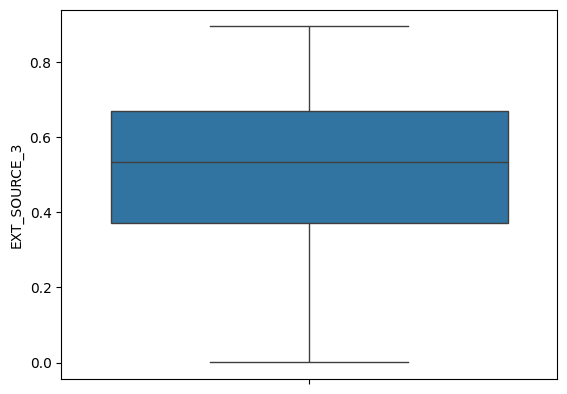

In [17]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

 - Counclusion: Since ots a numerical Colunms with no outliers and there is not much difference btw Mean and Median.Hence we can impute with mean or Median

In [18]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median() ,inplace = True)

In [19]:
app_df.EXT_SOURCE_3.isnull().mean() * 100

0.0

In [20]:
app_df.EXT_SOURCE_3.value_counts(normalize = True)* 100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.021492     0.000325
0.019468     0.000325
0.023062     0.000325
0.014556     0.000325
0.043227     0.000325
Name: proportion, Length: 814, dtype: float64

In [21]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

16

In [22]:
app_df.isnull().mean() *100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

### Handling Missing Values in Columns with 13% Null values

In [23]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize = True)* 100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [24]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize = True)* 100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

- Conclusion: We could see that 99% of Values in the colums AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR is 0.0. Hence impute these Columns with mode.

In [25]:
Cols = ["AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", "AMT_REQ_CREDIT_BUREAU_YEAR"]
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0], inplace = True)

In [26]:
app_df.isnull().mean() *100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


### Handling Missing Values less tha 1%

In [27]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [28]:
app_df.NAME_TYPE_SUITE.value_counts(normalize = True) * 100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [29]:
app_df.EXT_SOURCE_2.value_counts(normalize = True) * 100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.004725    0.000326
0.257313    0.000326
0.282030    0.000326
0.181540    0.000326
0.267834    0.000326
Name: proportion, Length: 119831, dtype: float64

In [30]:
app_df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts(normalize = True) * 100

DEF_30_CNT_SOCIAL_CIRCLE
0.0     88.526216
1.0      9.242716
2.0      1.736761
3.0      0.388920
4.0      0.082548
5.0      0.018271
6.0      0.003589
7.0      0.000326
34.0     0.000326
8.0      0.000326
Name: proportion, dtype: float64

- impute Numerical: median, non Numeric: mode

- Conclusion:
    - For Categorical Columns, impute the missing values with mode.
    - For numerical Columns, impute the missing values with median.

In [31]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0] ,inplace = True)

In [32]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0] ,inplace = True)

In [33]:
# for Numerical Columns
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace = True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace = True)
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace = True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace = True)

#### Convert Negative values to Positive in Days variables so that median is not affecte

In [34]:
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED = app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH = app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))

### Binning of Continuous variables

#### Standardizing Days Columns in years for easy binning

In [35]:
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply(lambda x : int(x//365))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x : int(x//365))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x : int(x//365))
app_df["YEARS__ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x : int(x//365))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x : int(x//365))

### Binning AMT_CREDIT Column

In [36]:
app_df.AMT_CREDIT.value_counts(normalize = True) * 100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [37]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [38]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT, [0,200000,400000,600000,800000,1000000],
                                      labels = ['Very low Credit',"Low Credit",'Medium Credit',"High Credit", "Very High Credit"])
app_df.AMT_CREDIT_Category.value_counts(normalize = True)*100

AMT_CREDIT_Category
Low Credit          31.511770
Medium Credit       25.733324
High Credit         16.791314
Very low Credit     14.035088
Very High Credit    11.928504
Name: proportion, dtype: float64

<Axes: xlabel='AMT_CREDIT_Category'>

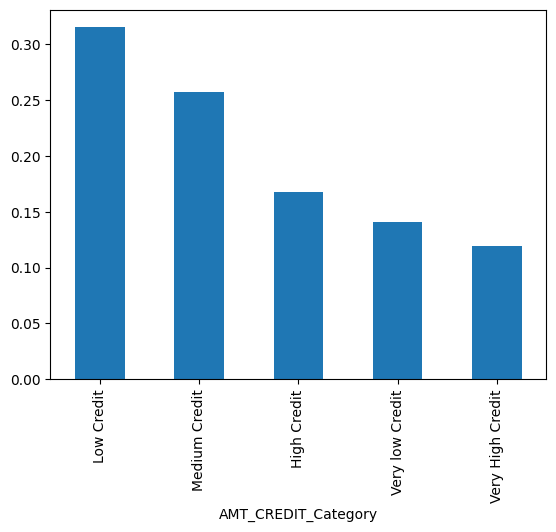

In [39]:
app_df["AMT_CREDIT_Category"].value_counts(normalize = True).plot.bar()

- Conclusion: The Credit amount of the loan for amount low(2L to 4L) or very High (above 8L).

## Binning YEARS_BIRTH Column

In [40]:
app_df["AGE_Category"] = pd.cut(app_df.YEARS_BIRTH, [0,25,45,65,85],
                               labels = ["Below 25", "25-45", "45-65", "65-85"])

In [41]:
app_df.AGE_Category.value_counts(normalize = True) * 100

AGE_Category
25-45       51.901233
45-65       41.163406
Below 25     5.306477
65-85        1.628885
Name: proportion, dtype: float64

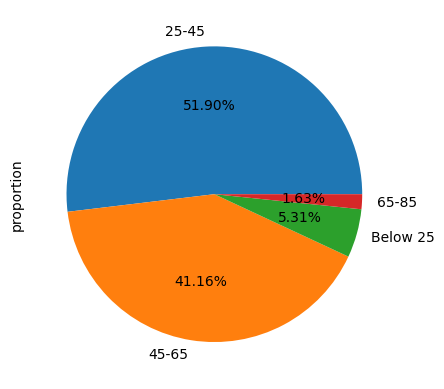

In [42]:
app_df["AGE_Category"].value_counts(normalize= True).plot.pie(autopct = '%1.2f%%')
plt.show()

- Conclusion: Most of the Applicants are between the age 25- 45 age group

## Data Imbalance Check

In [43]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0  ...                        0.0                       0.0   
1  ...                        0.0                       0.0   
2  ...                        0.0                       0.0   
3  ...                        0.0                       0.0   
4  ...                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR YEARS_BIRTH YEARS_EMPLOYED YEARS_REGISTRATION  \
0                        1.0          25              1                  9   
1                        0.0          45              3                  3   
2                        0.0          52              0                 11   
3                        0.0          52              8                 26   
4                        0.0          54              8                 11   

   YEARS__ID_PUBLISH  YEARS_LAST_PHONE_CHANGE  AMT_CREDIT_Category  \
0                  5                        3        Medium Credit   
1                  0                        2                  NaN   
2                  6                        2      Very low Credit   
3                  6                        1           Low Credit   
4                  9                        3        Medium Credit   

   AGE_Category  
0      Below 25  
1         25-45  
2         45-65  
3         45-65  
4         45-65  

[5 rows x 80 columns]

## Dividing the Application Dataset with Target Variable as 0 and 1

In [44]:
tar_0 = app_df[app_df.TARGET == 0]
tar_1 = app_df[app_df.TARGET == 1]

In [45]:
app_df.TARGET.value_counts(normalize = True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

- Conclusion: 1 out of 9/10  applicants are Defaulter

# Univariate Analysis

In [46]:
cat_cols = list(app_df.columns[app_df.dtypes == 'object'])
num_cols = list(app_df.select_dtypes(include=['int64', 'float64']).columns)

In [47]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [48]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMEN

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


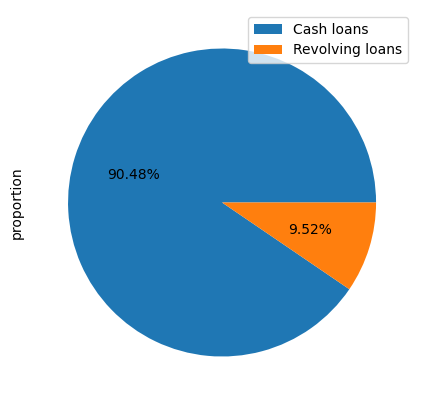

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


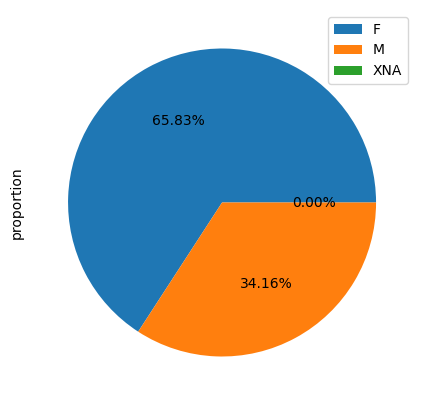

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


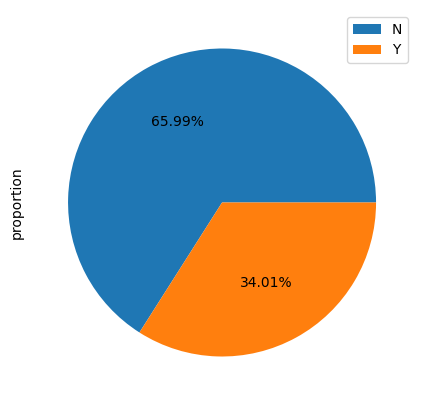

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


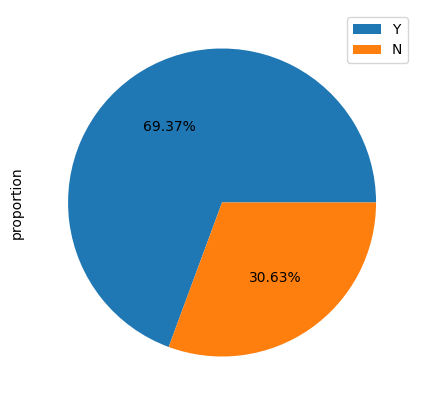

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


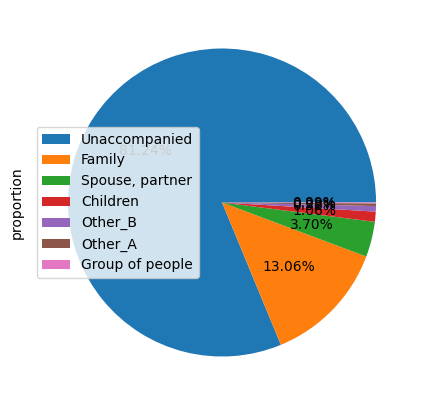

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


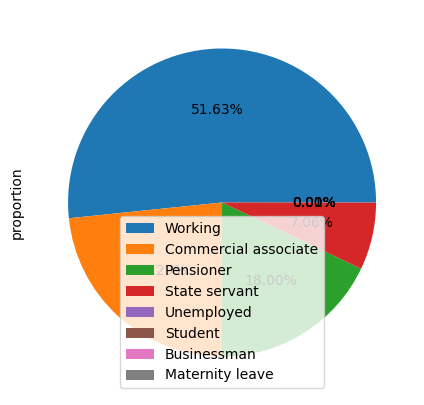

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


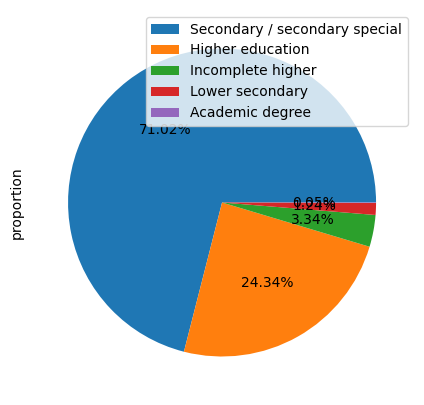

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


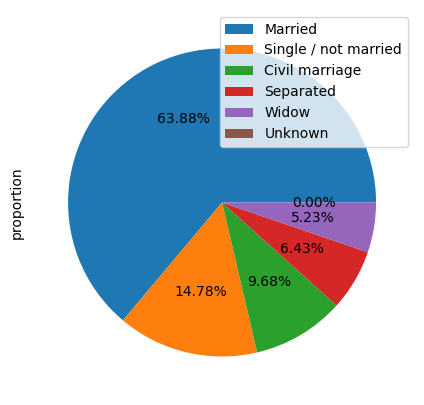

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


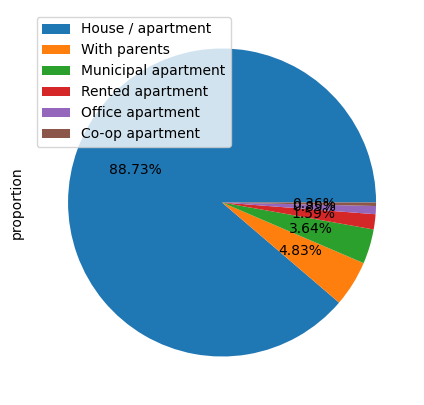

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


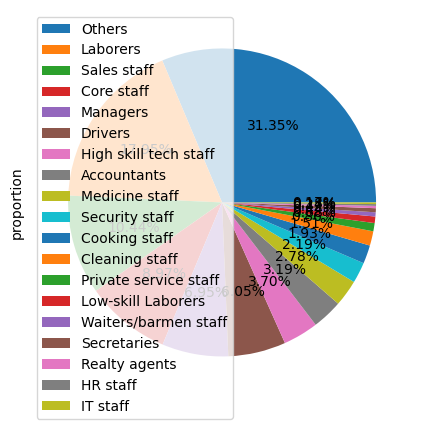

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


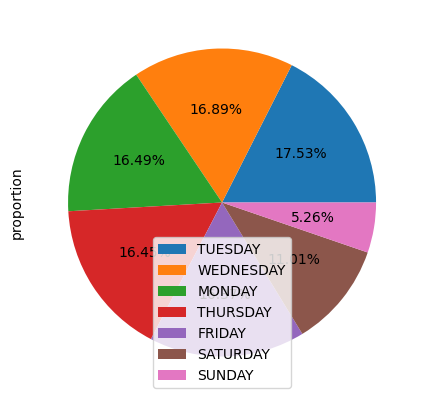

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

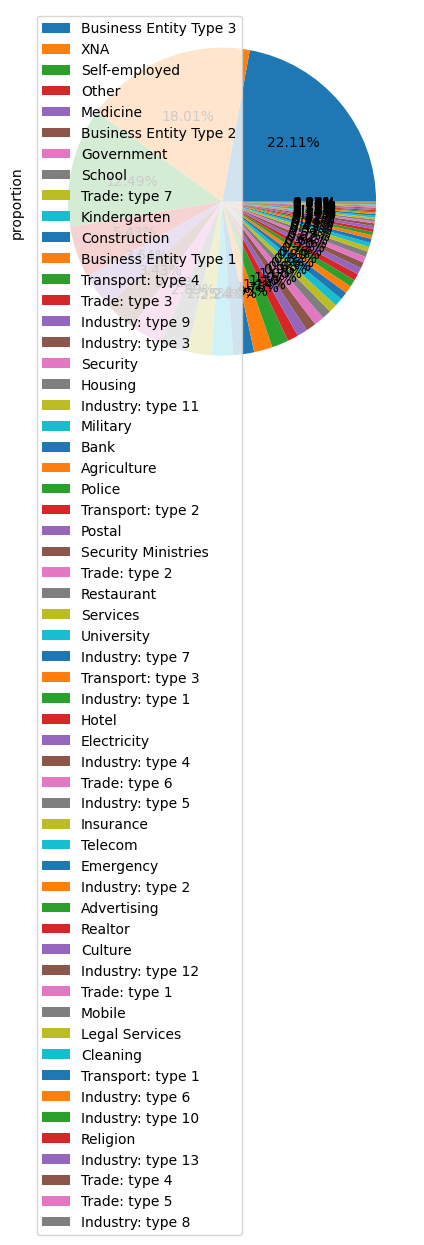

In [49]:
for col in cat_cols:
    print(app_df[col].value_counts(normalize = True))
    plt.figure(figsize = [5,5])
    app_df[col].value_counts(normalize= True).plot.pie(labeldistance = None,autopct = '%1.2f%%')
    plt.legend()
    plt.show()

- Conclusion >> Insights on below columns

1. NAME_CONTRACT_TYPE - More application have Cash loans than Revolving loans

2. CODE_GENDER - Number of Female applicants are twice than that of male applicants

3. FLAG_OWN_CAR - Most(70%) of the applicants do not own a car

4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house

5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied

6. NAME INCOME_TYPE - Most(51%) of the applicants are eaming their income from Work

7. NAME_EDUCATION_TYPE-71% of the applicants have completed Secondary / secondary special education

8. NAME FAMILY_STATUS-63% of the applicants are married

9. NAME_HOUSING_TYPE - 88% of the housing type of applicants are House/apartment 10. OCCUPATION TYPE - Most(31%) of the applicants have other Occupation type

11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday

12. ORGANIZATION TYPE - Most of the Organization type of employees are Business Entity Type 3

## Plot on Numerical Columns

### Categorizing columns with and without flags

In [50]:
num_cols_withoutflag =[]
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [51]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [52]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS__ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


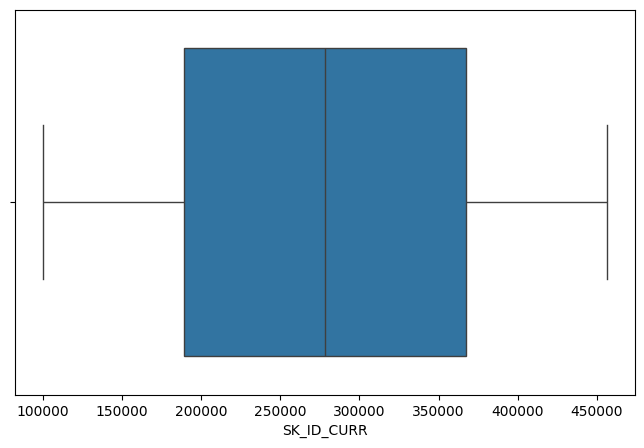

----------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


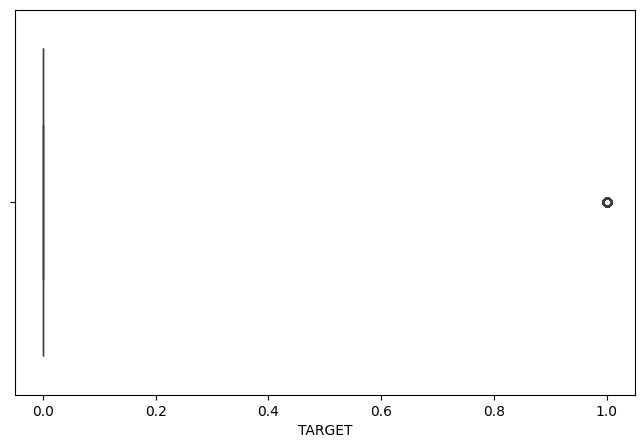

----------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


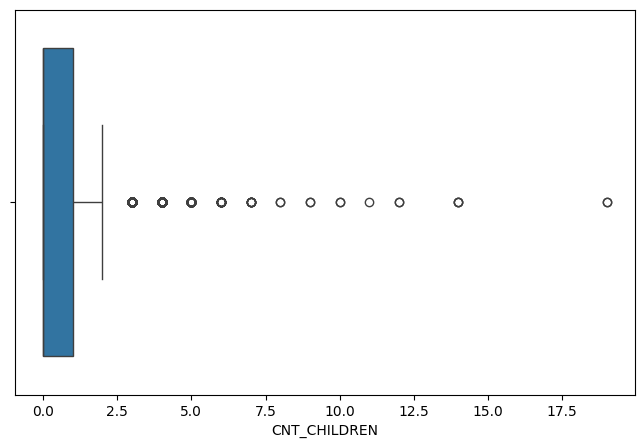

----------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


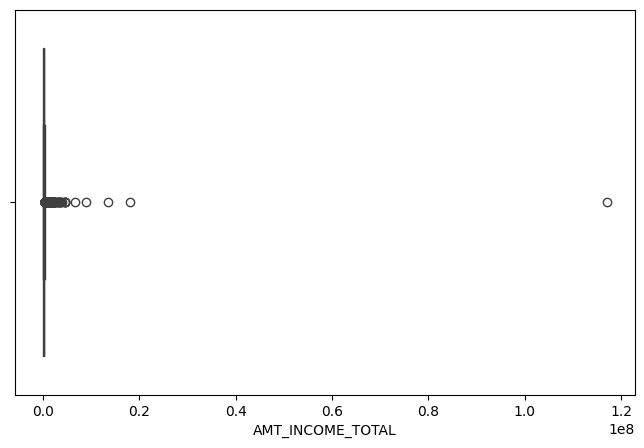

----------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


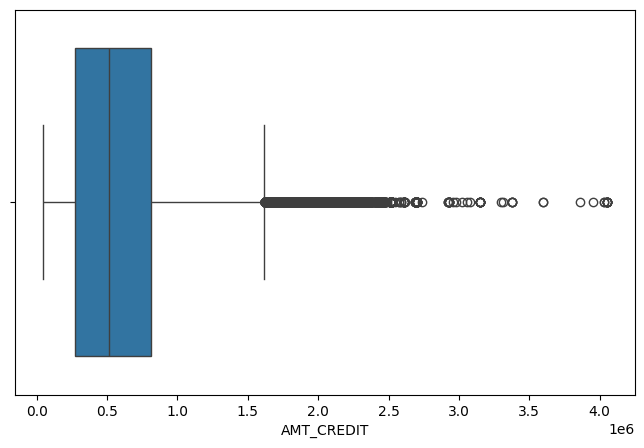

----------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


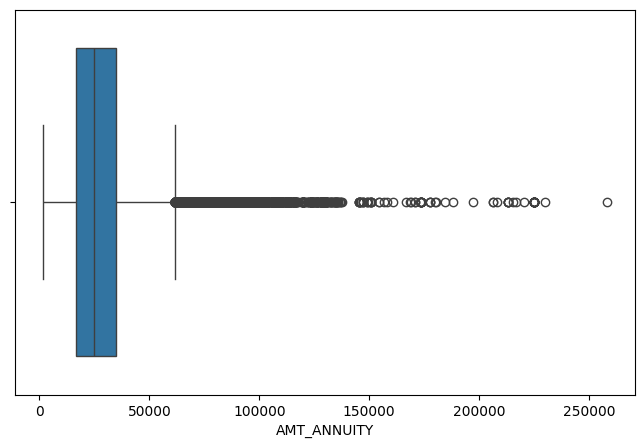

----------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


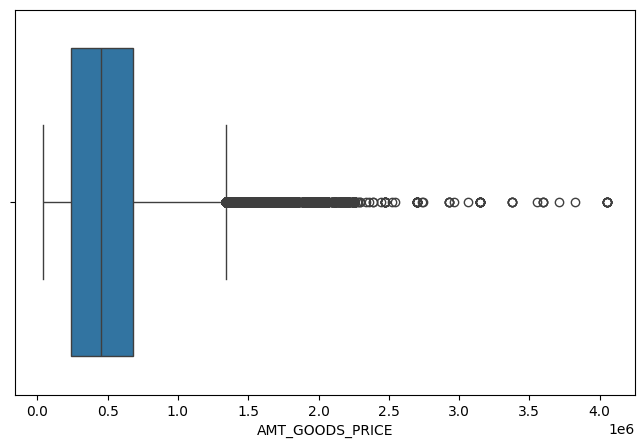

----------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


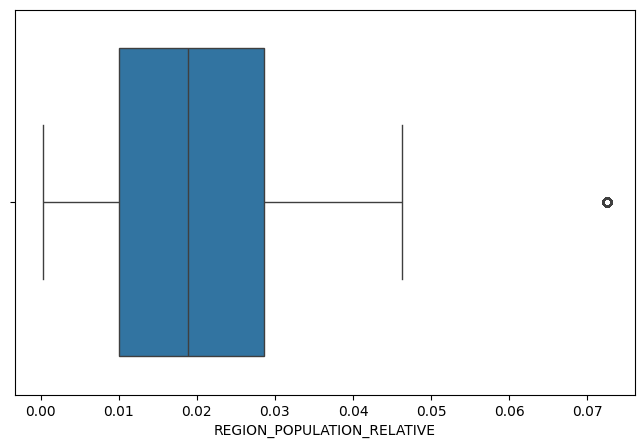

----------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


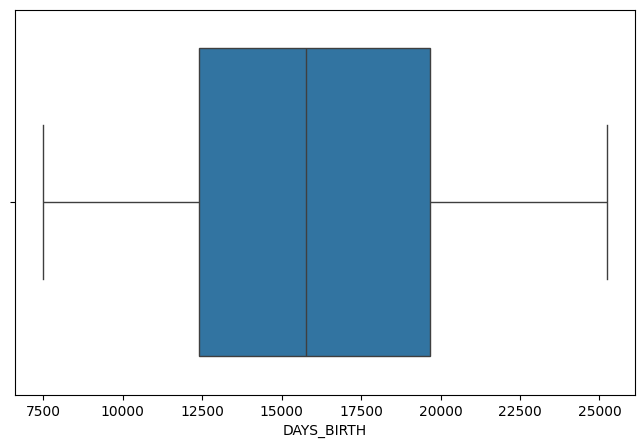

----------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


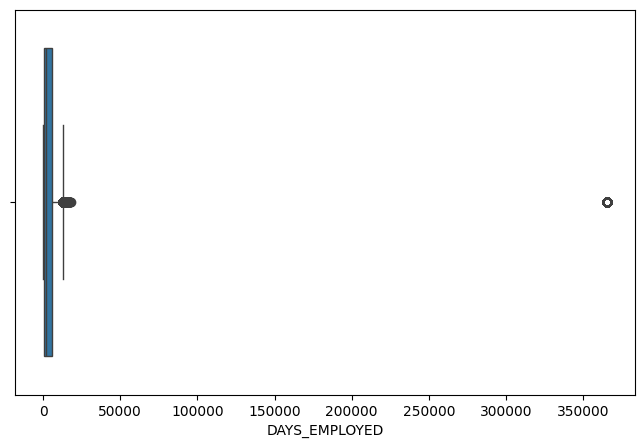

----------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


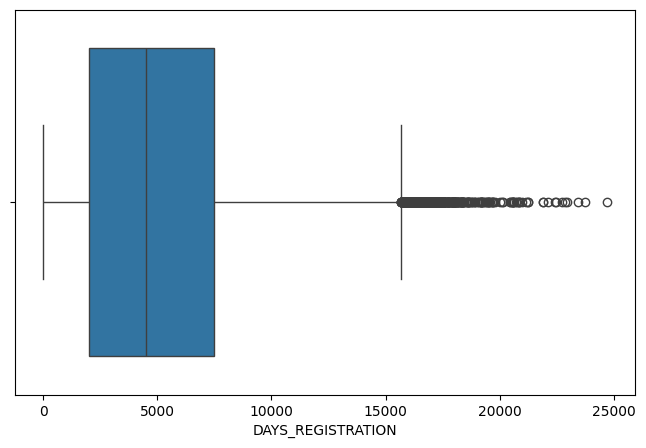

----------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


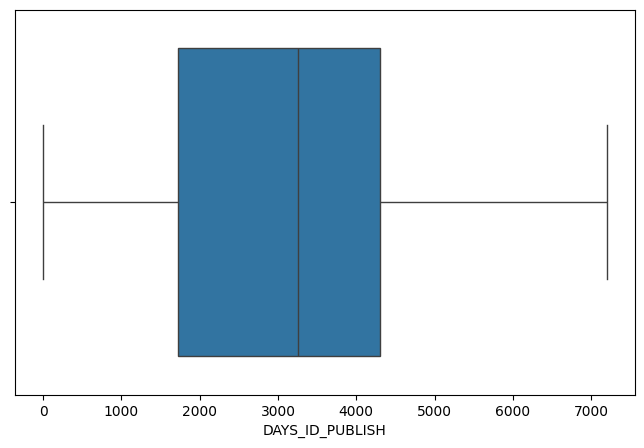

----------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


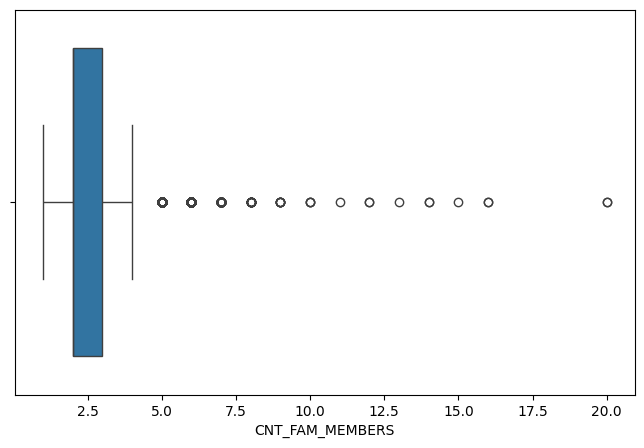

----------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


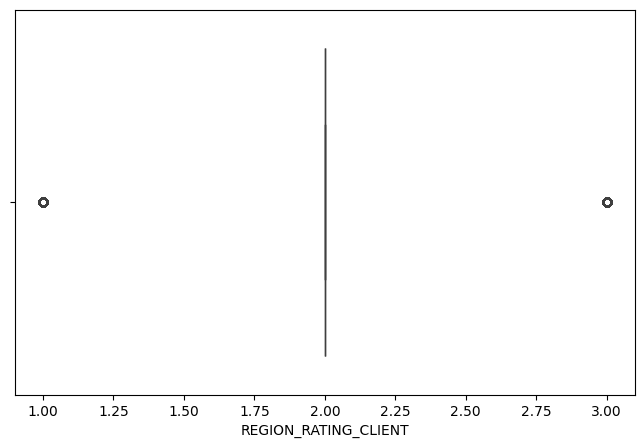

----------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


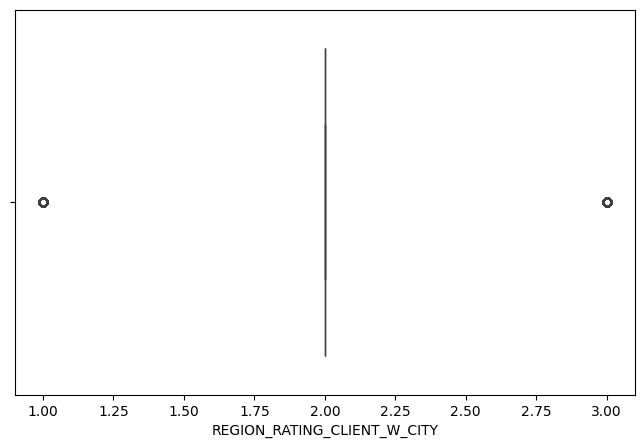

----------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


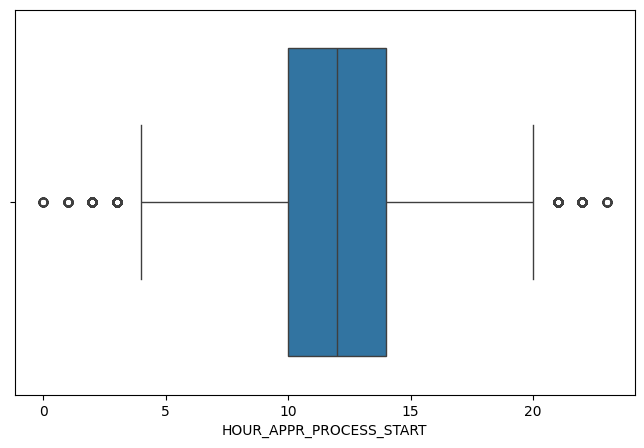

----------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


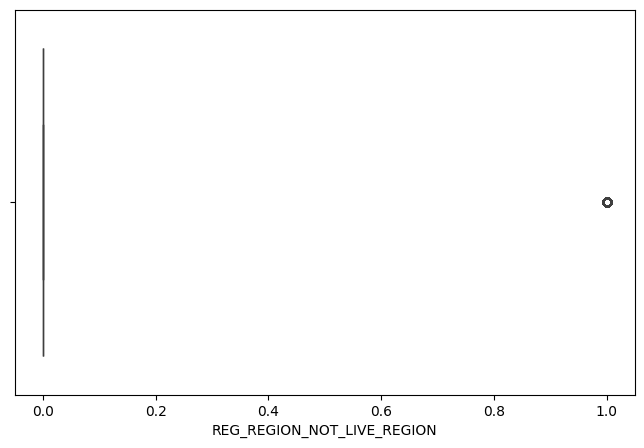

----------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


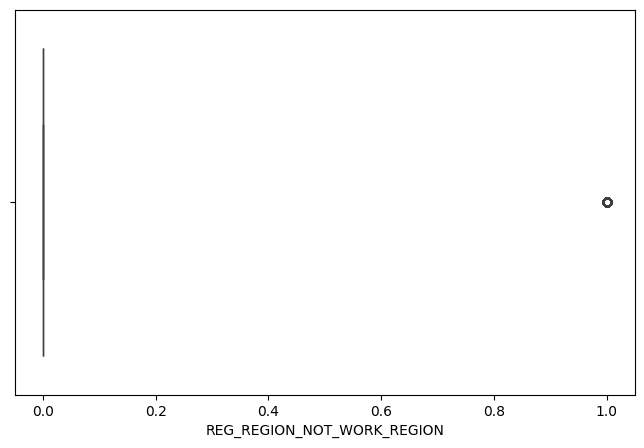

----------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


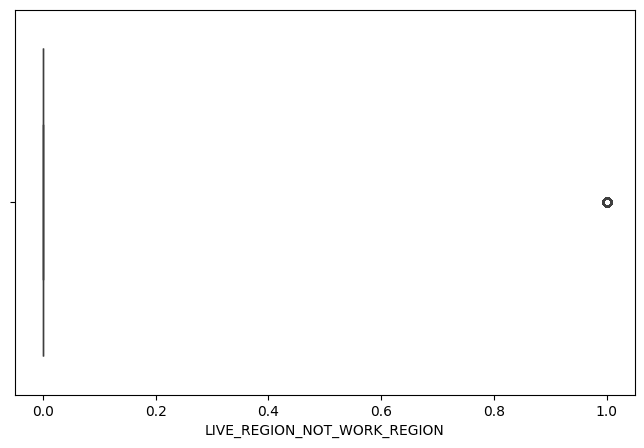

----------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


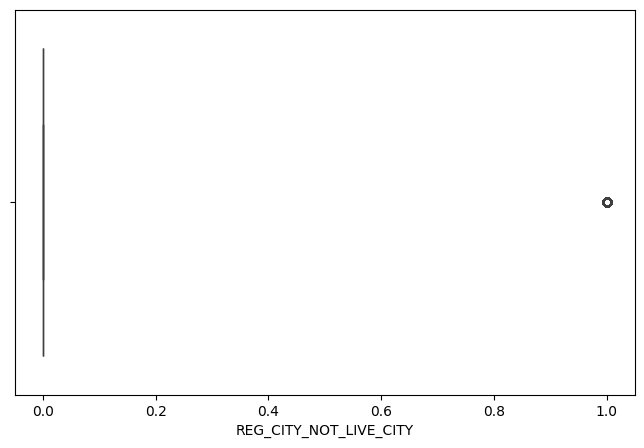

----------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


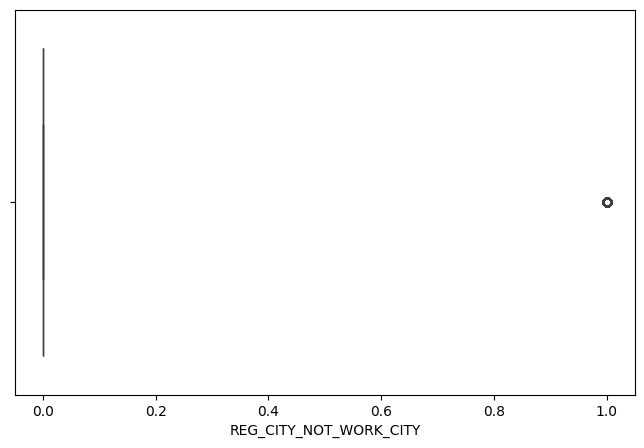

----------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


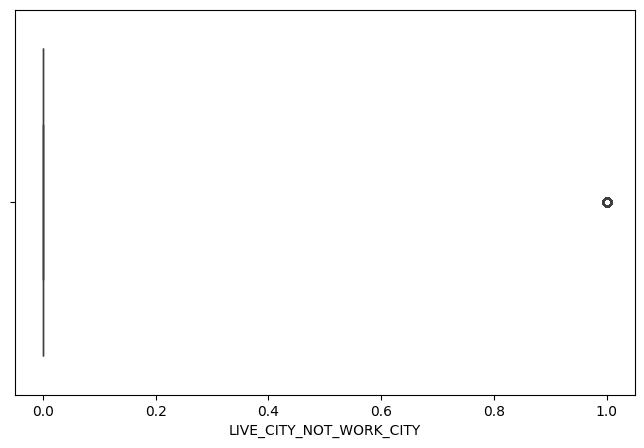

----------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


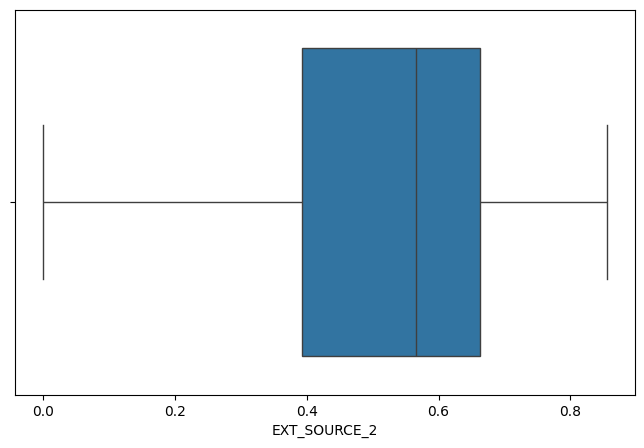

----------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


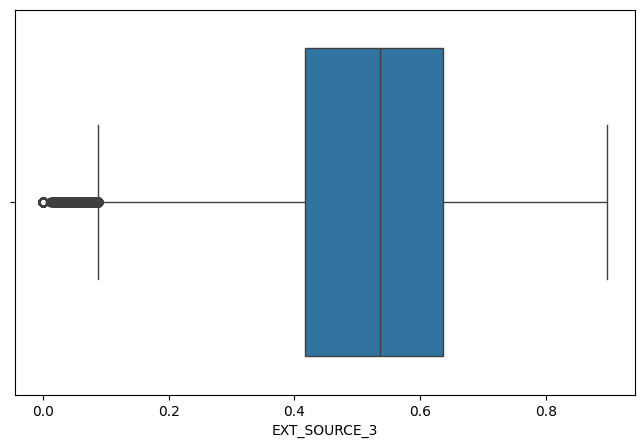

----------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


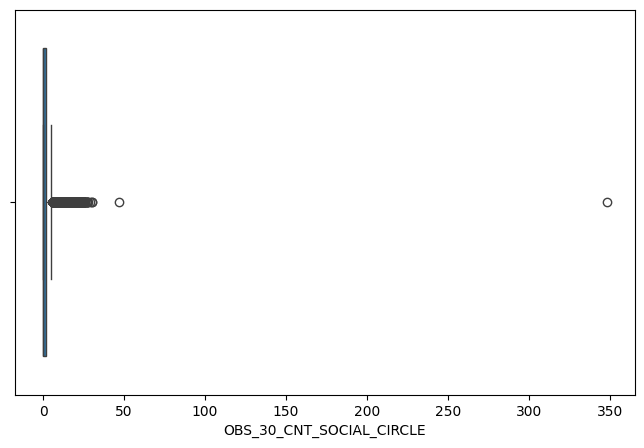

----------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


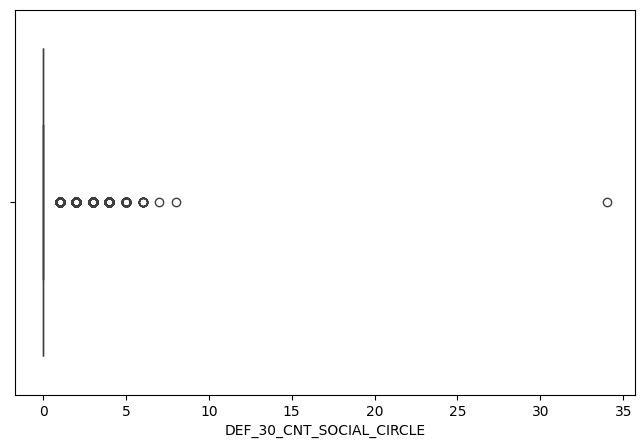

----------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


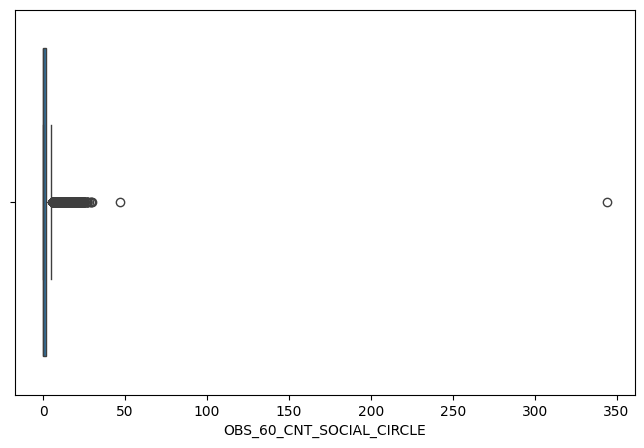

----------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


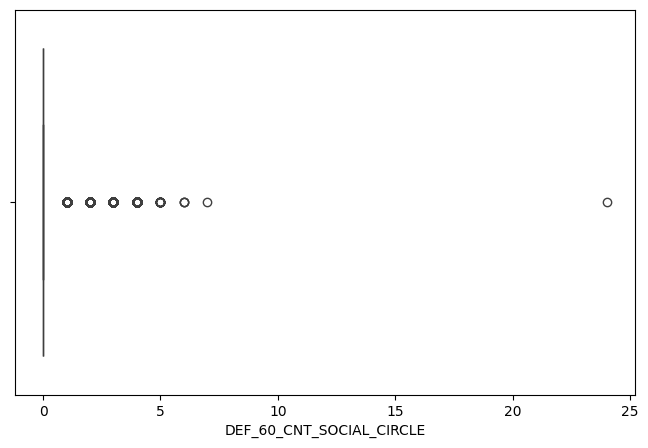

----------------
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


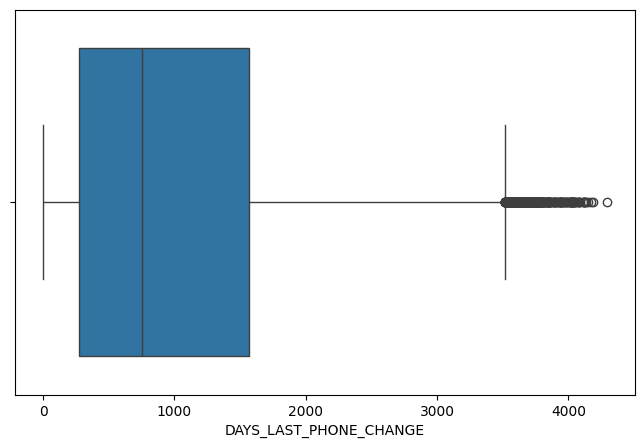

----------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


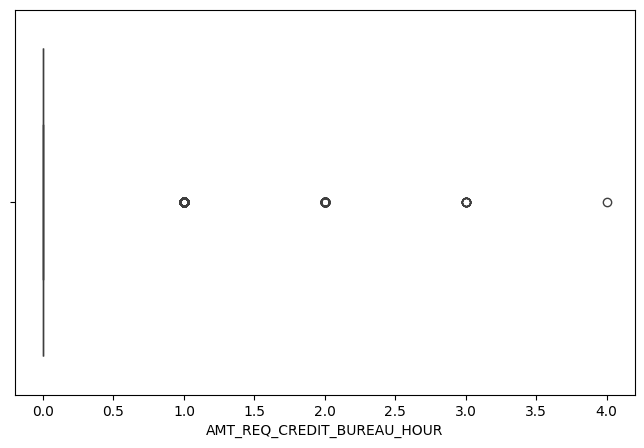

----------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


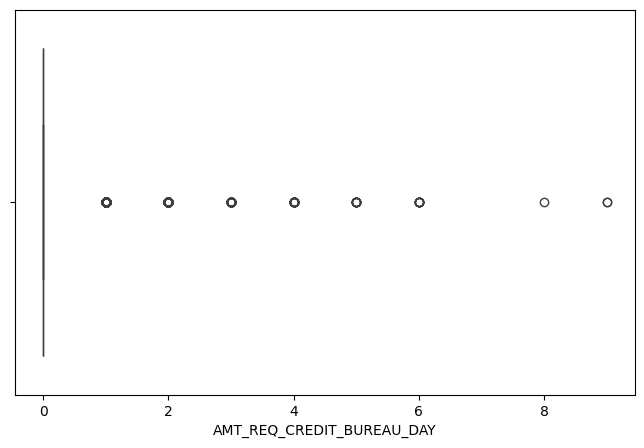

----------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


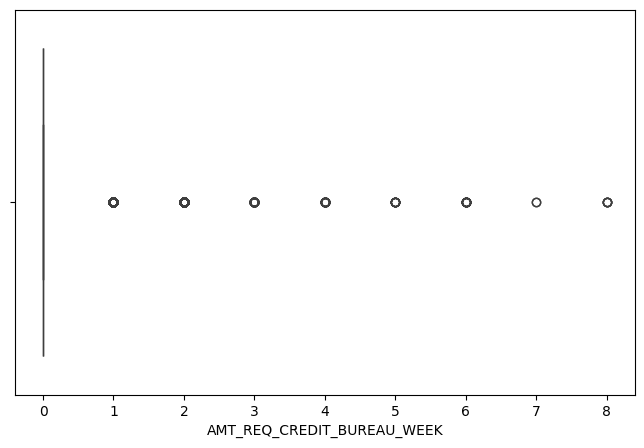

----------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


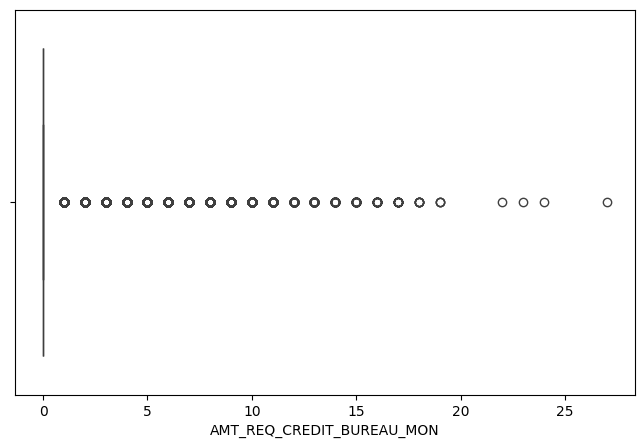

----------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


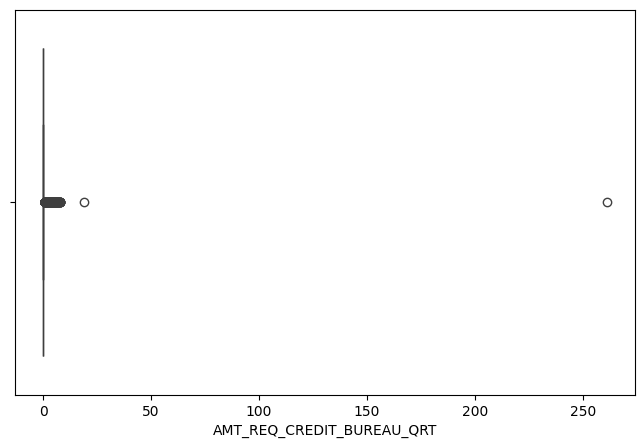

----------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


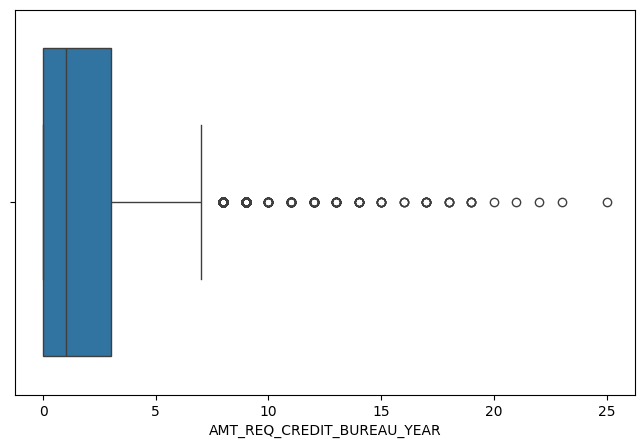

----------------
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


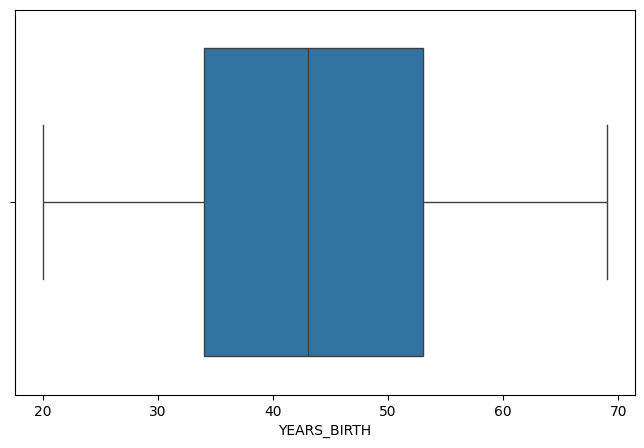

----------------
count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


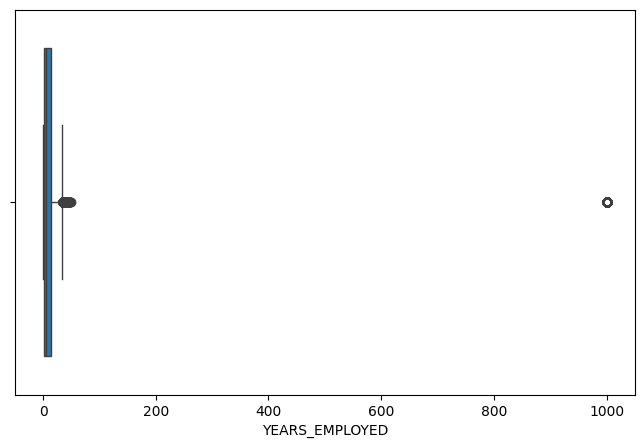

----------------
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


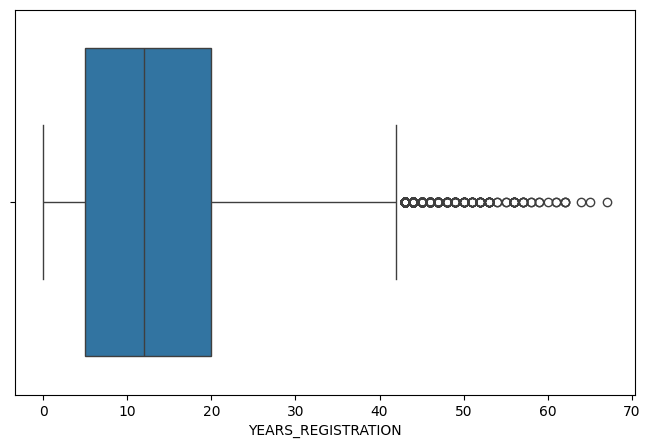

----------------
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS__ID_PUBLISH, dtype: float64


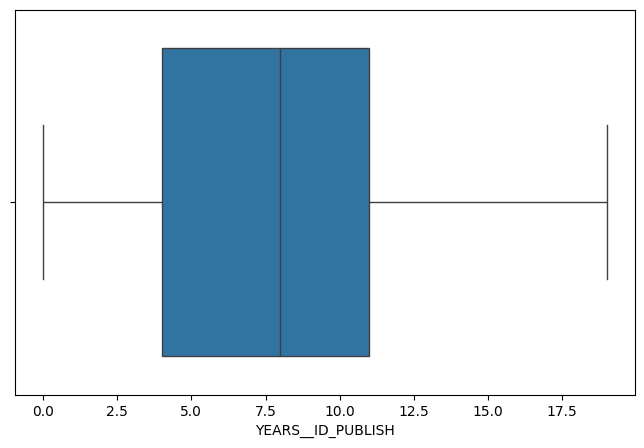

----------------
count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


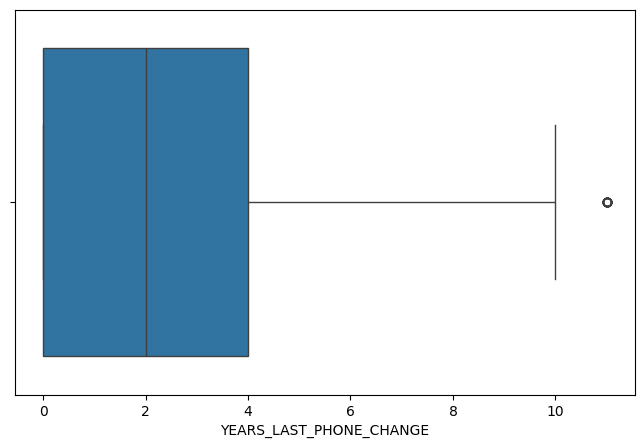

----------------


In [53]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize= (8,5))
    sns.boxplot(data = app_df, x = col)
    plt.show()
    print("----------------")
    

- Conclusion >> Few Columns are with outliers are below

1. AMT_INCOME_TOTAL Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

2. AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variationin mean and median due to outliers

3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

4. AMT_GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

5. REGION POPULATION_RELATIVE Column has a one outliers and there not much difference between mean and median

### Univariate Analyasis on Columns with target 0 & 1

plot on NAME_CONTRACT_TYPE for Target 0 and 1


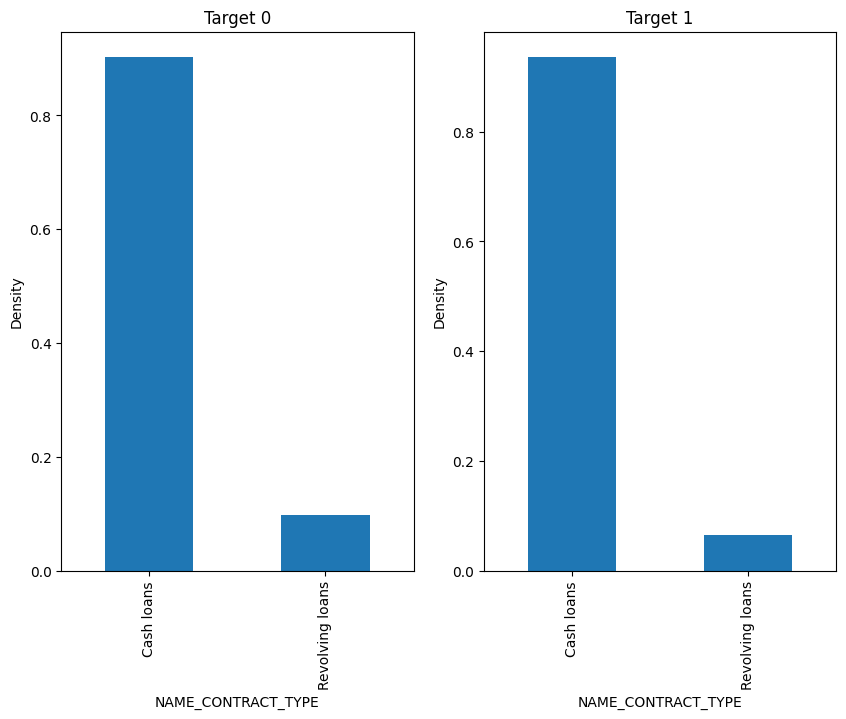



 ----------------------------------------


plot on CODE_GENDER for Target 0 and 1


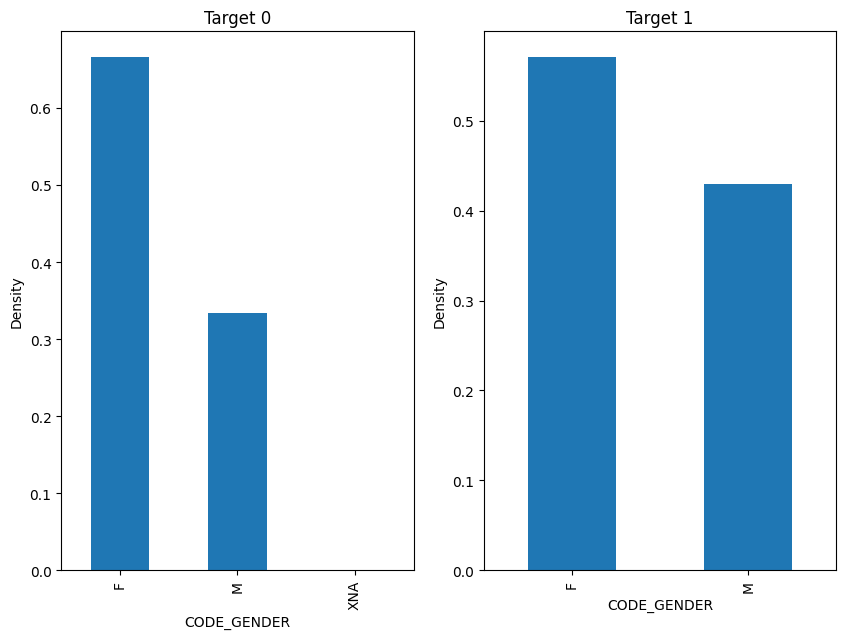



 ----------------------------------------


plot on FLAG_OWN_CAR for Target 0 and 1


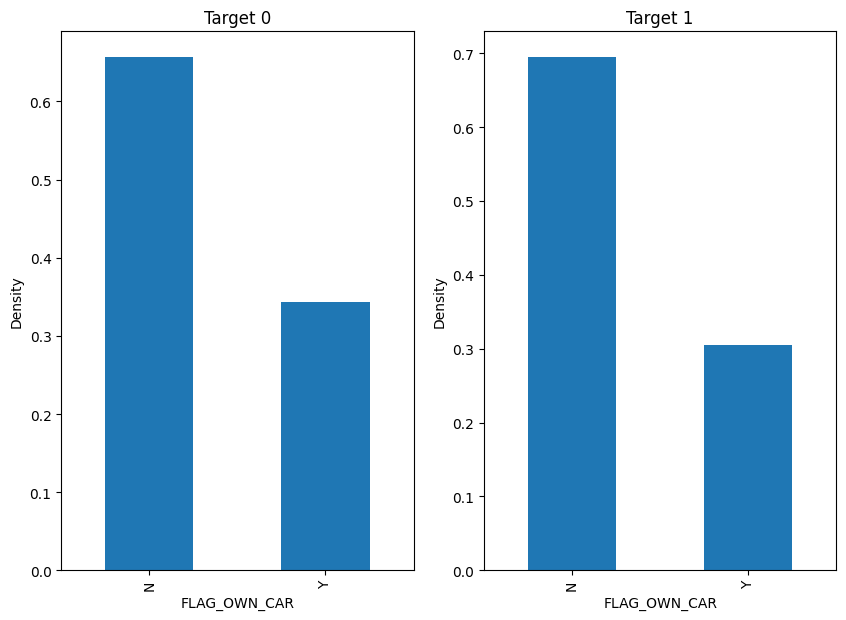



 ----------------------------------------


plot on FLAG_OWN_REALTY for Target 0 and 1


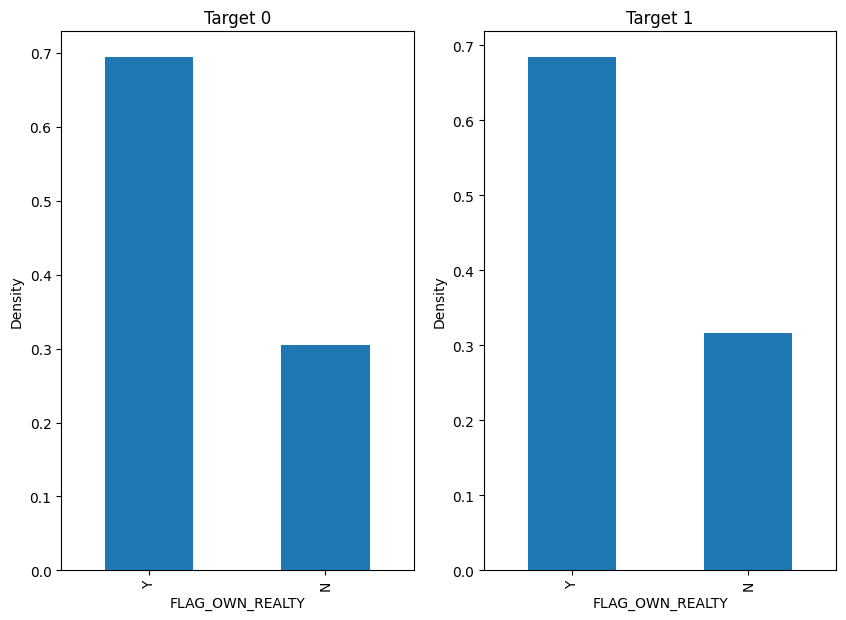



 ----------------------------------------


plot on NAME_TYPE_SUITE for Target 0 and 1


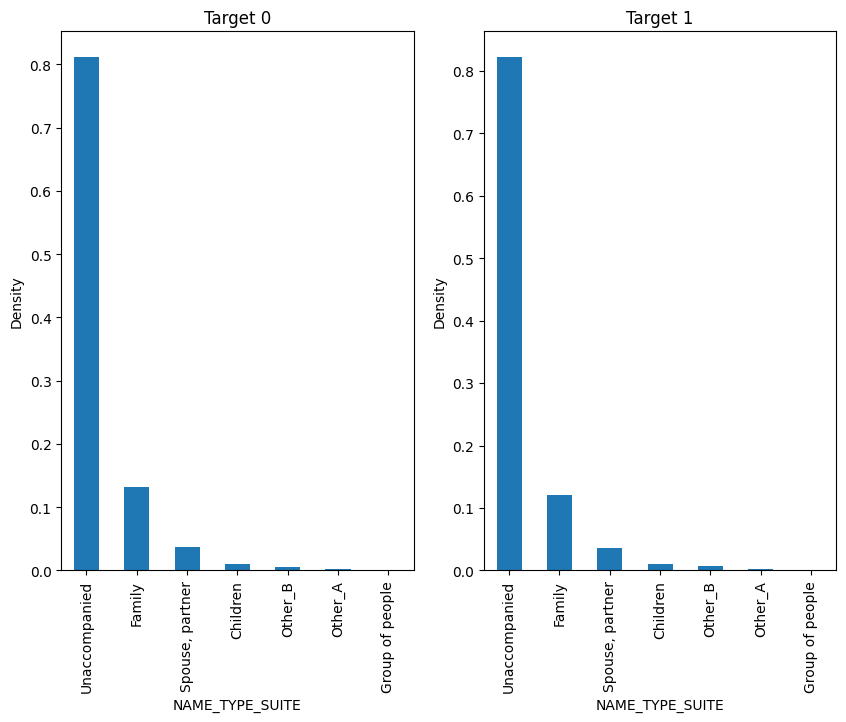



 ----------------------------------------


plot on NAME_INCOME_TYPE for Target 0 and 1


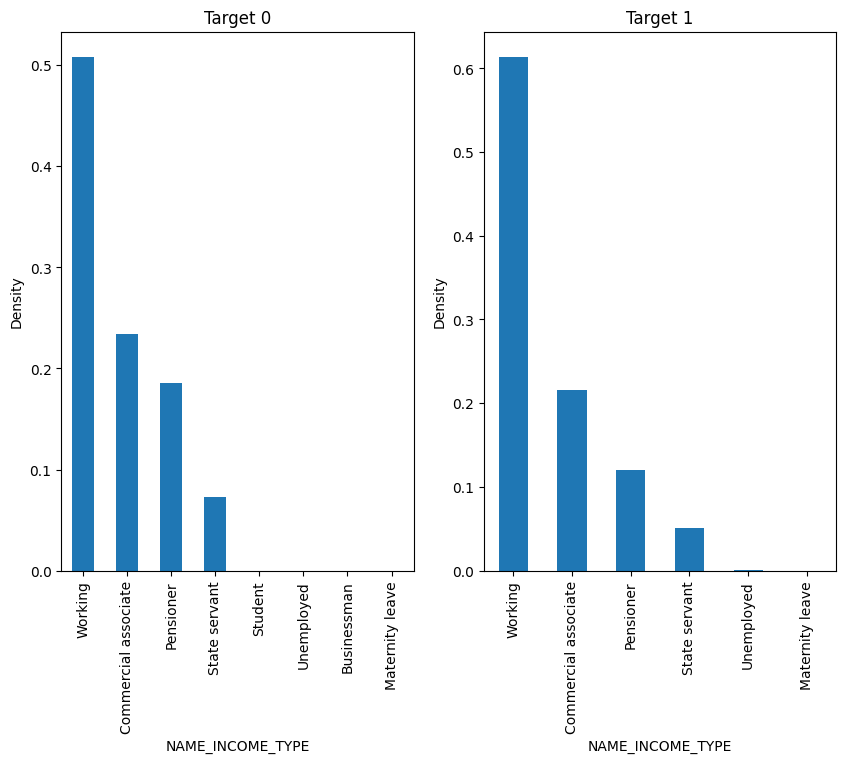



 ----------------------------------------


plot on NAME_EDUCATION_TYPE for Target 0 and 1


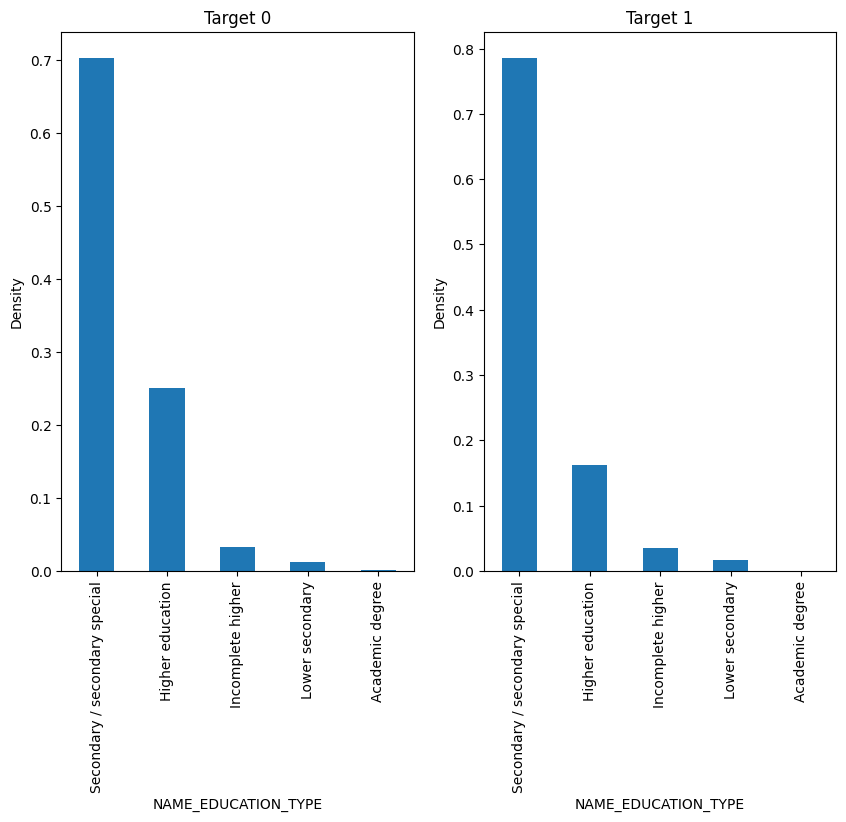



 ----------------------------------------


plot on NAME_FAMILY_STATUS for Target 0 and 1


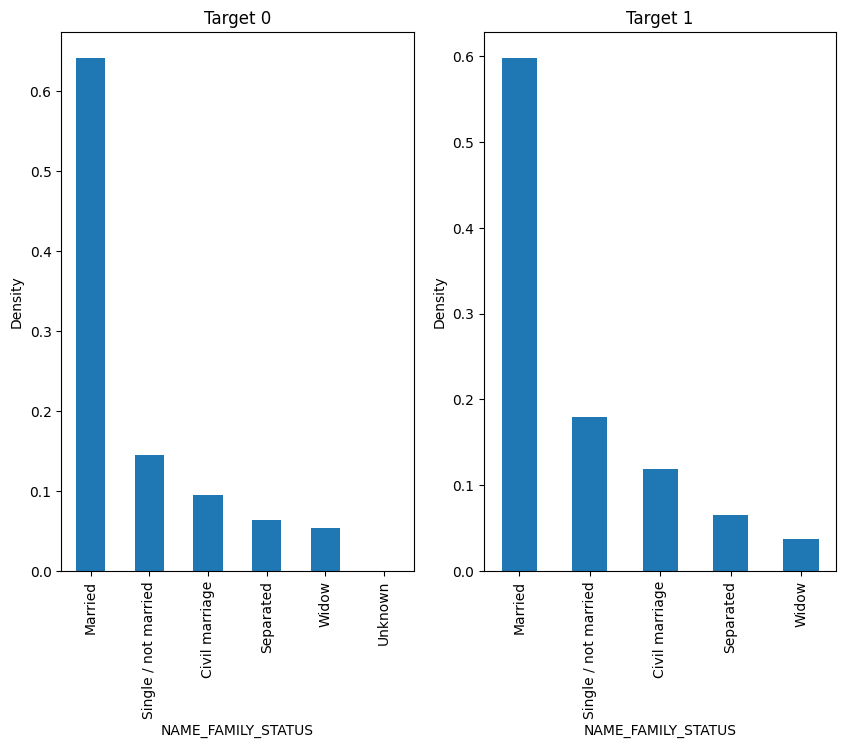



 ----------------------------------------


plot on NAME_HOUSING_TYPE for Target 0 and 1


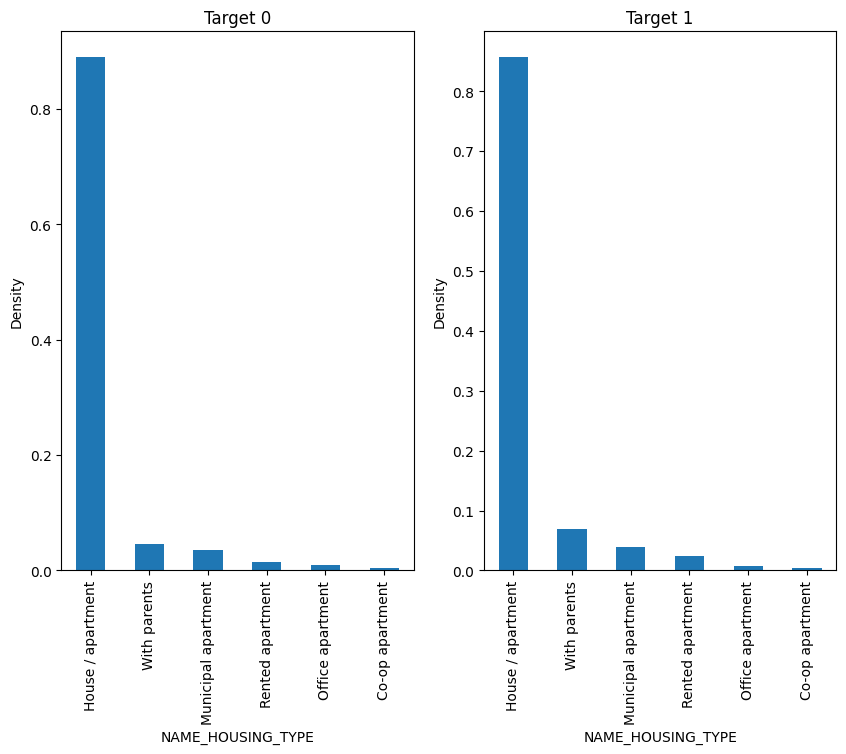



 ----------------------------------------


plot on OCCUPATION_TYPE for Target 0 and 1


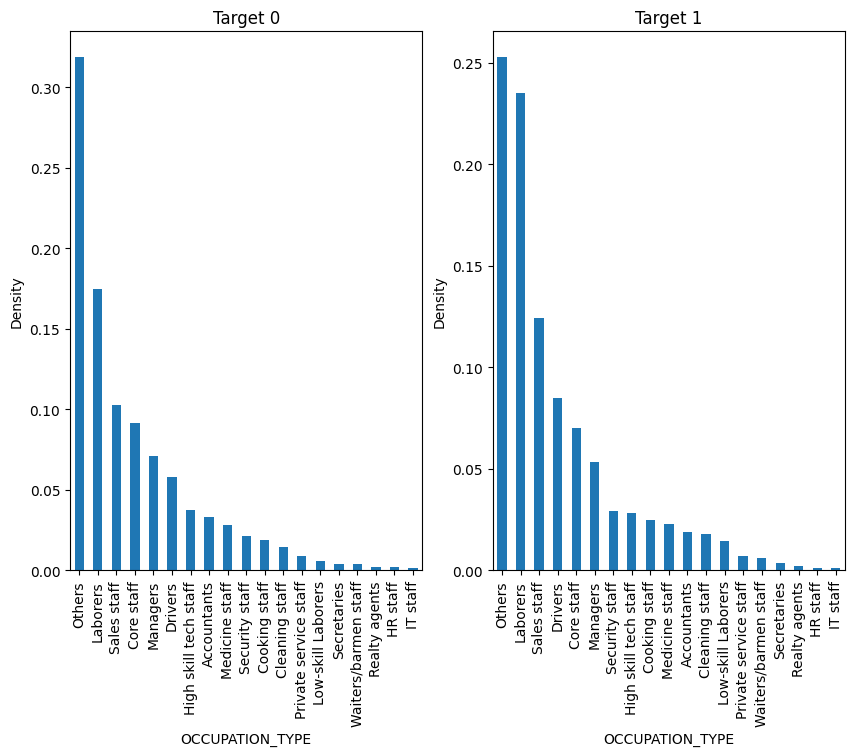



 ----------------------------------------


plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


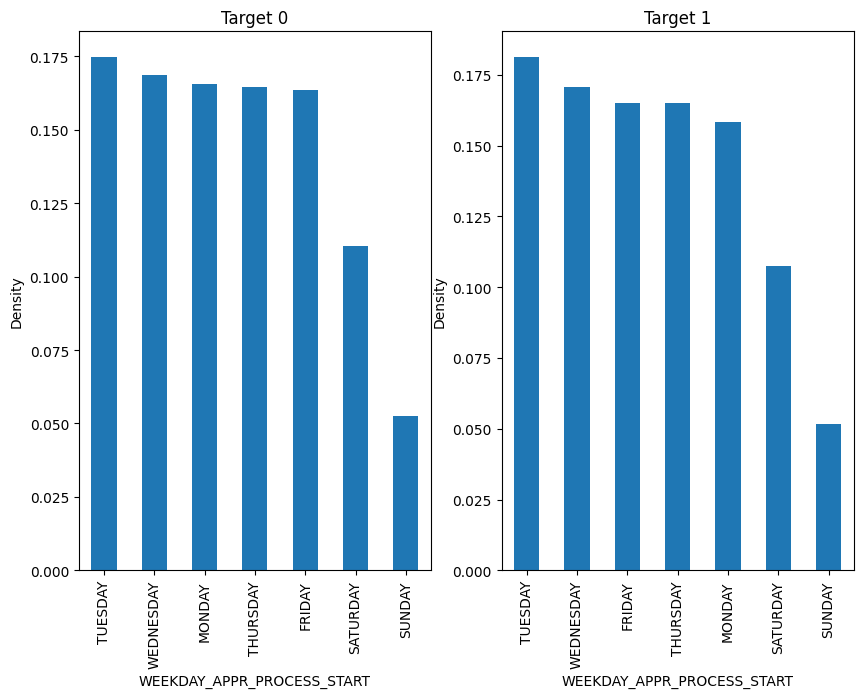



 ----------------------------------------


plot on ORGANIZATION_TYPE for Target 0 and 1


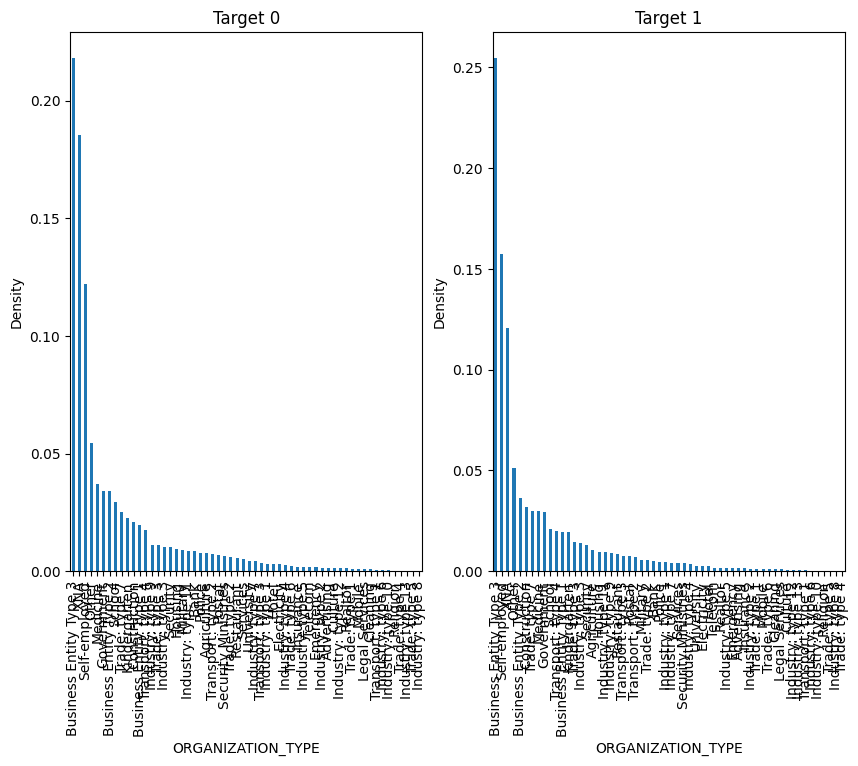



 ----------------------------------------




In [54]:
for col in cat_cols:
    print(f"plot on {col} for Target 0 and 1")
    plt.figure(figsize = [10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize = True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize = True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n ----------------------------------------\n\n")

- Conclusion >> Below are the column insights

1. NAME_CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1

2. CODE_GENDER - Number of Female applicants are twice than that of male applicants both for Target 0 and 1

3. FLAG_OWN_CAR-Most(70%) of the applicants do not own a car both for Target 0 and 1

4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house both for Target 0 and 1 

5. NAME_TYPE_SUITE - Most(81%) of the applicants are Unaccompanied both for Target 0 and 1

6. NAME_INCOME_TYPE - For both Target 0 and 1. Most(51%) of the applicants are earning their income from Work

7. NAME_EDUCATION_TYPE - For both Target 0 and 1, almost 71% of the applicants have completed Secondary/secondary special education

8. NAME FAMILY_STATUS-63% of the applicants are marned for both Target 0 and 1 . 

9. NAME HOUSING_TYPE-88% of the housing type of applicants are House/apartment for both Target 0 and 1.

10. OCCUPATION_TYPE - Most(31%) of the applicants have other Occupation type, are non defaulters and Laborere, Sales staff, Drivers and core staff are not able to repay the loan on time

11. WEEKDAY_APPR_PROCESS_START- Most of the applicant have applied the loan on Tuseday and the least on Sunday

12. ORGANIZATION_TYPE - Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

### Analysis on AMT_GOOD_PRICE on Target 0 & 1

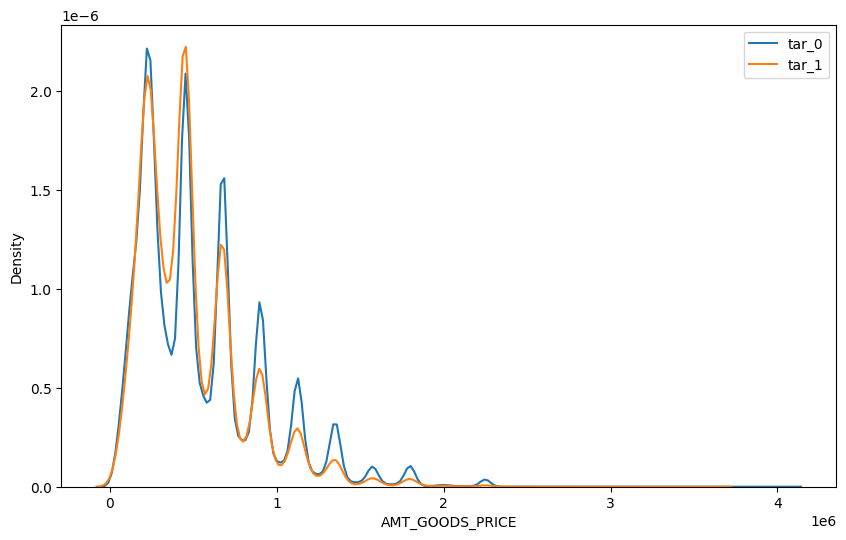

In [55]:
plt.figure(figsize = (10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'], label= 'tar_0', hist = False)
sns.distplot(tar_1['AMT_GOODS_PRICE'], label= 'tar_1', hist = False)
plt.legend()
plt.show()

- conclusion: The price of the goods for which loan is given has the same variation for Target 0 and 1.

## bivariate And Multivariate Anaylsis

### Bivariate Analysis between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

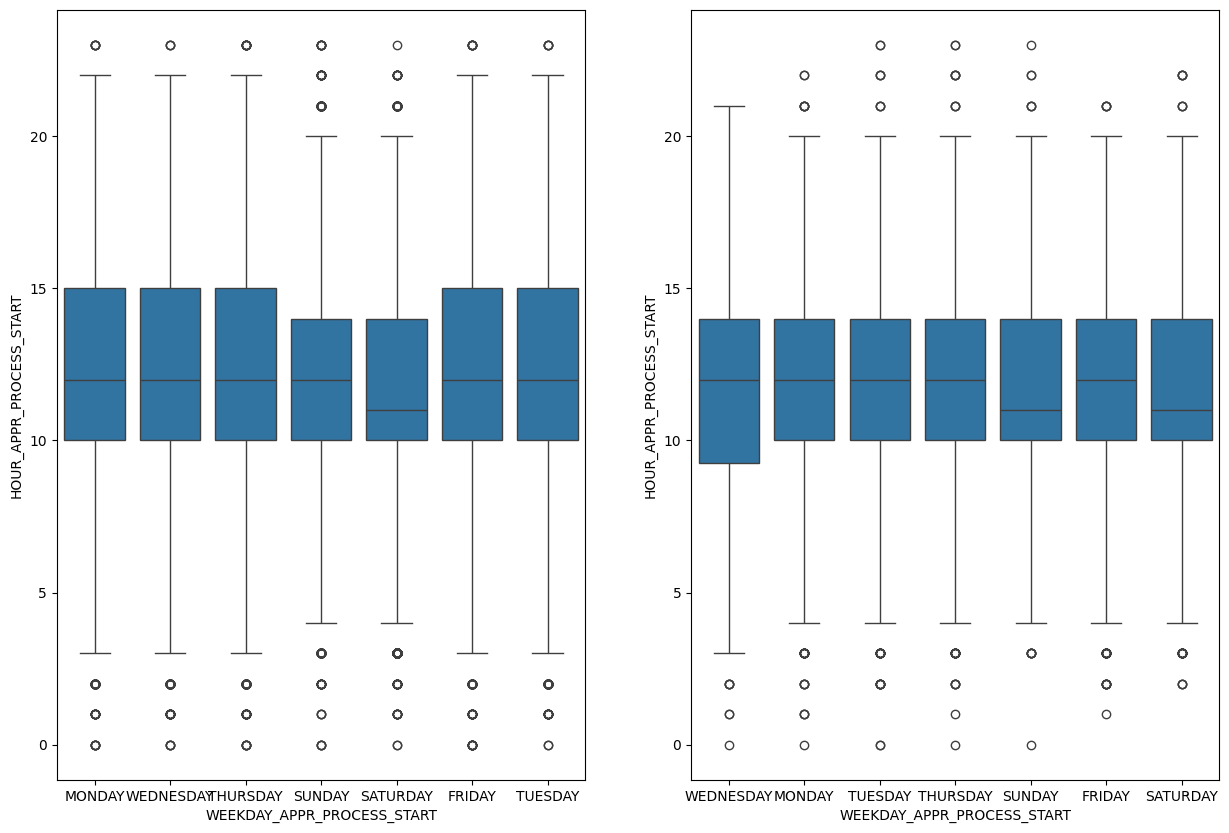

In [56]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.boxplot(x = "WEEKDAY_APPR_PROCESS_START",y = "HOUR_APPR_PROCESS_START", data= tar_0)
plt.subplot(1,2,2)
sns.boxplot(x = "WEEKDAY_APPR_PROCESS_START",y = "HOUR_APPR_PROCESS_START", data= tar_1)
plt.show()

- Conclusion >>

1. The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm.

2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both Target 0 and 1.

3. The loan defaulters have applied for the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm.

#### Bivariate Analysis between AGE_Category vs AMT_CREDIT

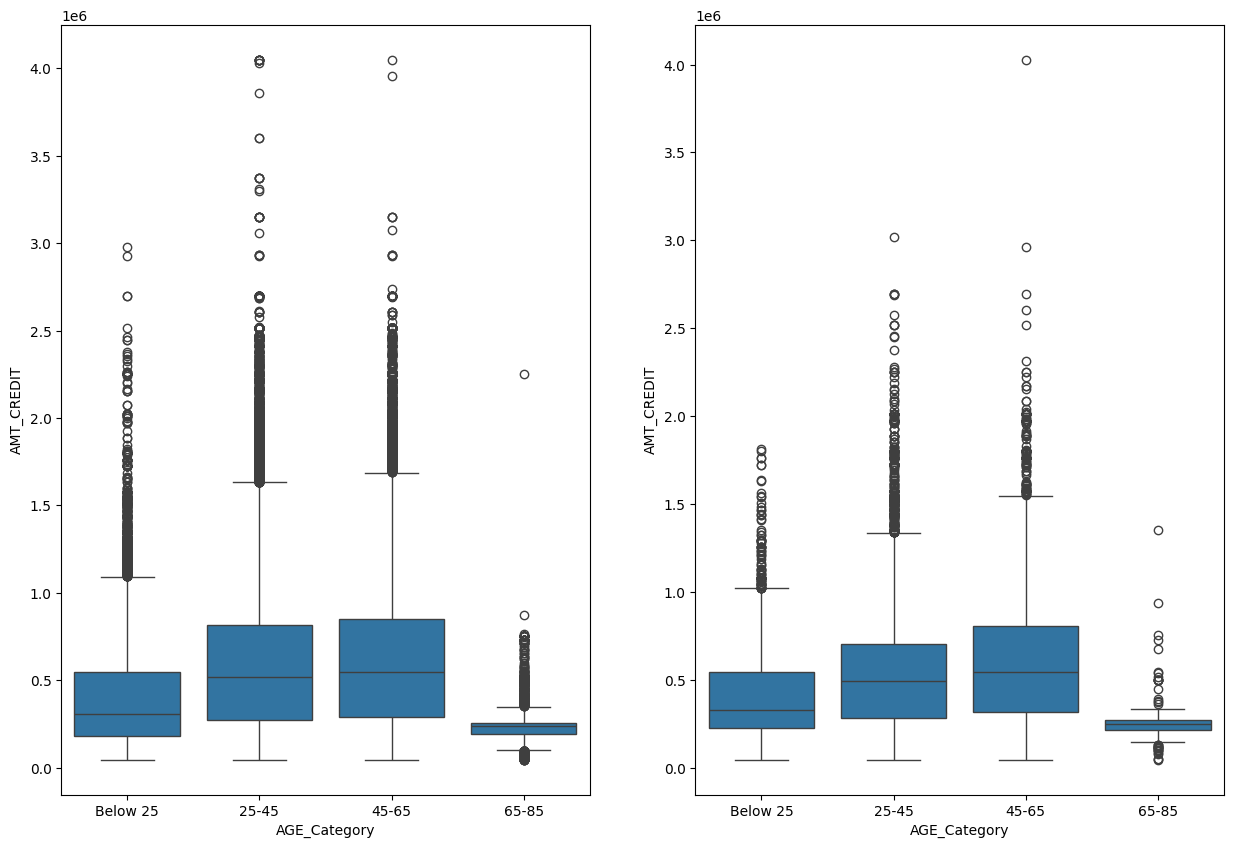

In [57]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.boxplot(x = "AGE_Category",y = "AMT_CREDIT", data= tar_0)
plt.subplot(1,2,2)
sns.boxplot(x = "AGE_Category",y = "AMT_CREDIT", data= tar_1)
plt.show()

- Conclusion >>

1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan property.

2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters.

3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age.

### Pair Plot of Amount Columns for target 0

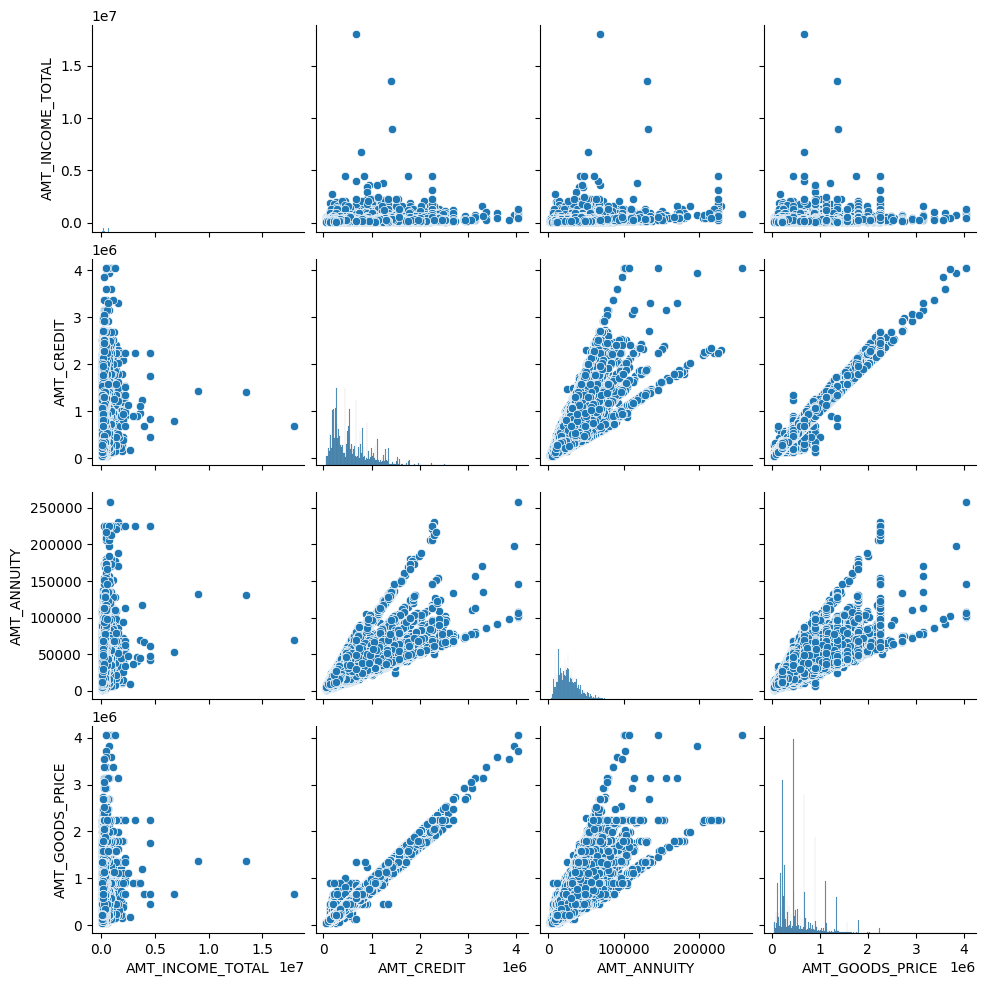

In [58]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT",'AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

- Conclusion >> For Applicants who are able to replay the loan on time

1. AMT_CREDIT Increases or varies linearly with AMT_GOODS PRICE and AMT_CREDIT Increases with AMT_ANNUITY

2. AMT_ ANNUITY Increases with Increases in AMT_GOODS PRICE and AMT_Credit

3. AMT_GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY

4. AMT_INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT.AMT_ANNUITY AMT_GOODS_PRICE


### Pair Plot of Amount Columns for target 1

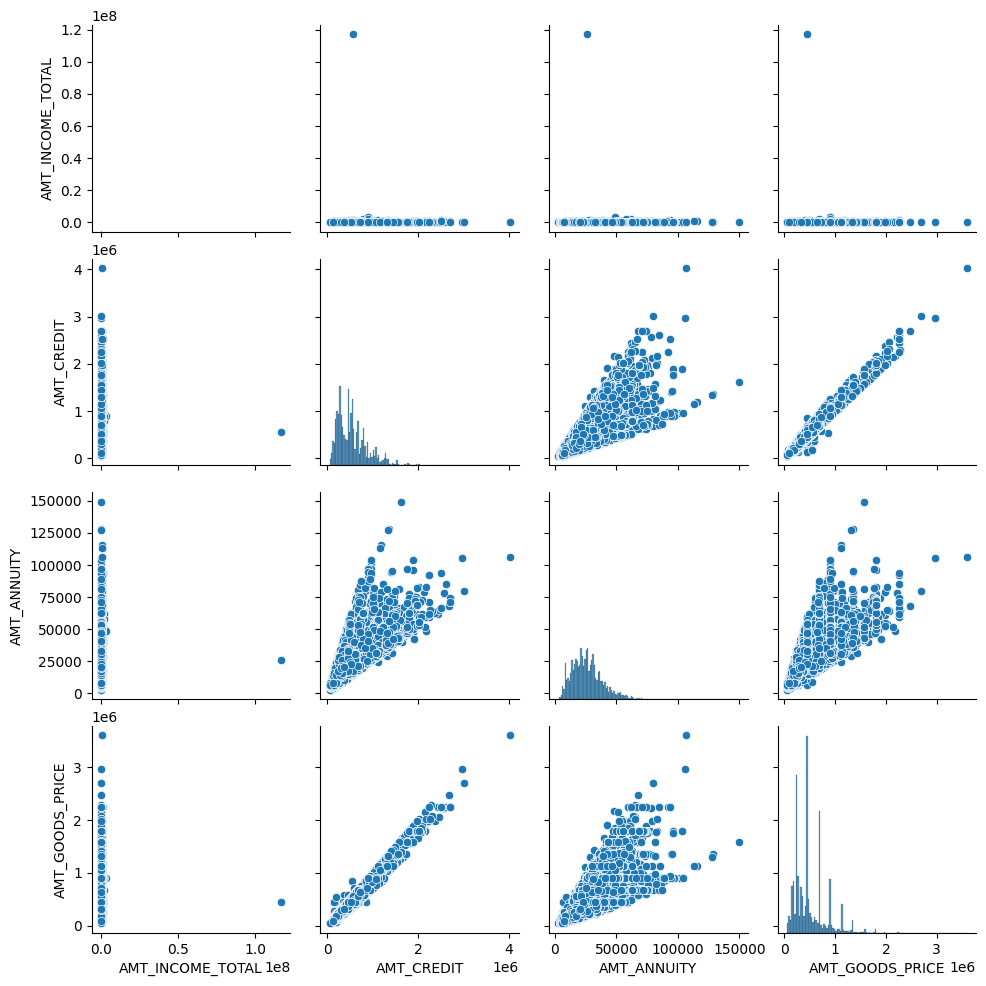

In [59]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT",'AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

- Conclusion >> For Applicants who are unable to replay the Loan on time

1. AMT CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT CREDIT Increases with AMT_ANNUITY 2. AMT ANNUITY Increases with Increases in AMT GOODS PRICE and AMT Credit

3. AMT GOODS_PRICE Increases with Increases in AMT Credit and AMT ANNUITY

4. AMT INCOME_TOTAL has a drastic Increase with slight increase in AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

### Co-relation between Numerical Columns

In [60]:
corr_data = app_df[["AMT_INCOME_TOTAL", "AMT_CREDIT", 'AMT_ANNUITY',"AMT_GOODS_PRICE","YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS__ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           25   
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS__ID_PUBLISH  \
0               1                   9                  5   
1               3                   3                  0   
2               0                  11                  6   
3               8                  26                  6   
4               8                  11                  9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [61]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_BIRTH                     -0.027226    0.055408    -0.009453   
YEARS_EMPLOYED                  -0.063836   -0.064319    -0.102853   
YEARS_REGISTRATION              -0.027783   -0.009521    -0.038375   
YEARS__ID_PUBLISH               -0.008648    0.006831    -0.011100   
YEARS_LAST_PHONE_CHANGE          0.018592    0.077057     0.064893   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027226       -0.063836   
AMT_CREDIT                      0.986734     0.055408       -0.064319   
AMT_ANNUITY                     0.774837    -0.009453       -0.102853   
AMT_GOODS_PRICE                 1.000000     0.053484       -0.062191   
YEARS_BIRTH                     0.053484     1.000000        0.623879   
YEARS_EMPLOYED                 -0.062191     0.623879        1.000000   
YEARS_REGISTRATION             -0.011456     0.331704        0.214592   
YEARS__ID_PUBLISH               0.009571     0.271453        0.274460   
YEARS_LAST_PHONE_CHANGE         0.079095     0.086527       -0.016393   

                         YEARS_REGISTRATION  YEARS__ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027783          -0.008648   
AMT_CREDIT                        -0.009521           0.006831   
AMT_ANNUITY                       -0.038375          -0.011100   
AMT_GOODS_PRICE                   -0.011456           0.009571   
YEARS_BIRTH                        0.331704           0.271453   
YEARS_EMPLOYED                     0.214592           0.274460   
YEARS_REGISTRATION                 1.000000           0.101373   
YEARS__ID_PUBLISH                  0.101373           1.000000   
YEARS_LAST_PHONE_CHANGE            0.058831           0.093213   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018592  
AMT_CREDIT                              0.077057  
AMT_ANNUITY                             0.064893  
AMT_GOODS_PRICE                         0.079095  
YEARS_BIRTH                             0.086527  
YEARS_EMPLOYED                         -0.016393  
YEARS_REGISTRATION                      0.058831  
YEARS__ID_PUBLISH                       0.093213  
YEARS_LAST_PHONE_CHANGE                 1.000000

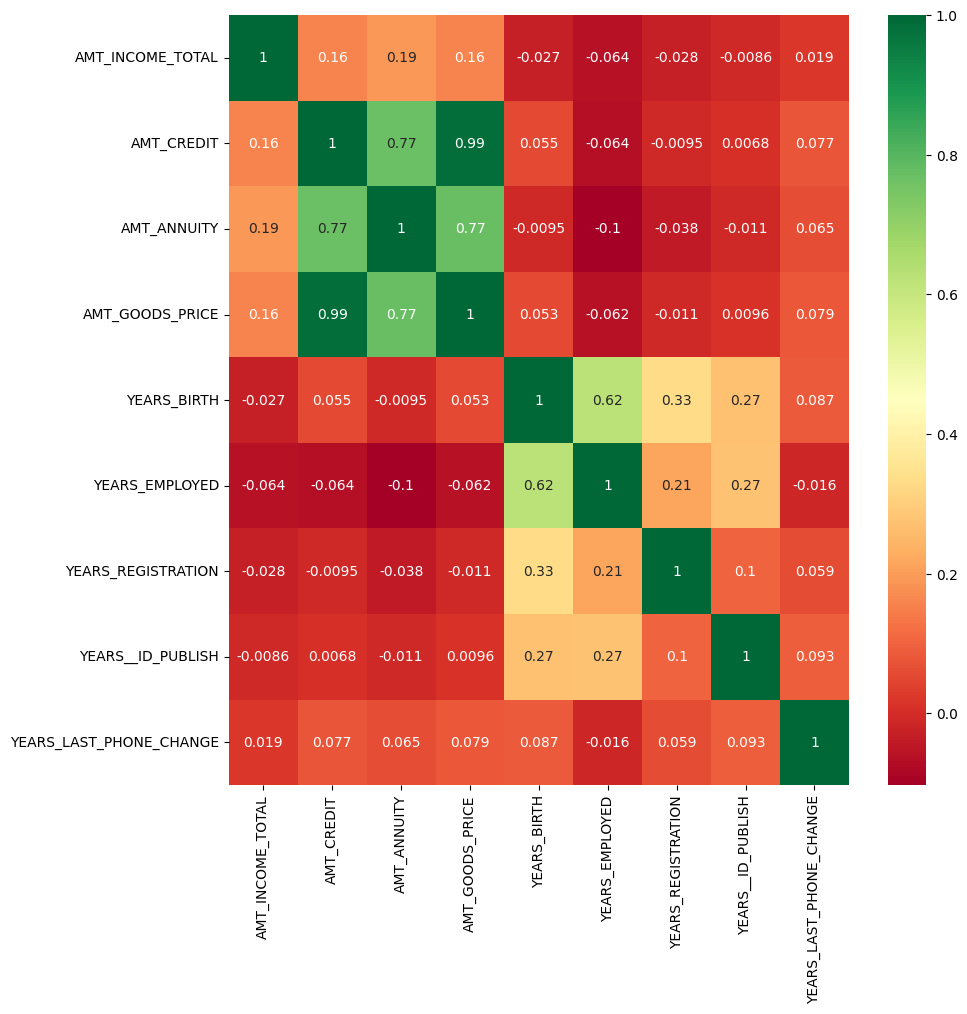

In [62]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

- Conclusion >>

1. AMT_INCOME TOTAL-It has a positive corelation index of 0. 16,0 19,0 16 with AMT CREDIT AMT_ANNUITY AMT_GOODS_PRICE respectively


2. AMT CREDIT- Is has negative coreftaion index of 0.064 with YEARS_EMPLOYED and positive coreltaion index of 0.99.0.77 with AMT_GOODS_PRICE AMT ANNUITY respectively.

3. AMT ANNUITY - Is has negative coreltaion index of 0.1 with YEARS_EMPLOYED and positive coreltaion index of 0.77 with AMT_CREDIT

4. AMT_GOODS_PRICE-It has a positive corelation with AMT_CREDIT,AMT_ANNUITY

5. YEARS BIRTH-It has a positive corelation with YEARS_EMPLOYED, AMT_GOODS_PRICE and negative coreltaion with AMT_ANNUITY AMT_INCOME_TOTAL

6. YEARS_EMPLOYED-Is has negative coreftaion index of 0 1 with AMT_ANNUITY and has a positive corelation with YEARS_REGISTRATION YEARS_ID PUBLISH

7. YEARS REGISTRATION-It has a positive corelation with YEARS ID PUBLISH, YEARS BIRTH, YEARS_EMPLOYED 

8. YEARS_ID_PUBLISH - It has a positive corelation with YEARS_REGISTRATION and negative coreltaion with AMT_INCOME_TOTAL AMT_ANNUITY

9. YEARS_LAST_PHONE_CHANGE - It has negative coreftaion with YEARS_EMPLOYED and positive corelation with AMT_GOODS_PRICE,YEARS ID PUBLISH

## Split the numerical variables based on Target 0 and 1 to find the co-relation

In [63]:
corr_data_0 = tar_0[["AMT_INCOME_TOTAL", "AMT_CREDIT", 'AMT_ANNUITY',"AMT_GOODS_PRICE","YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS__ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   
5           99000.0    490495.5      27517.5         454500.0           46   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS__ID_PUBLISH  \
1               3                   3                  0   
2               0                  11                  6   
3               8                  26                  6   
4               8                  11                  9   
5               4                  13                  1   

   YEARS_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        6

In [64]:
corr_data_1 = tar_1[["AMT_INCOME_TOTAL", "AMT_CREDIT", 'AMT_ANNUITY',"AMT_GOODS_PRICE","YEARS_BIRTH", "YEARS_EMPLOYED", "YEARS_REGISTRATION", "YEARS__ID_PUBLISH", "YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           25   
26          112500.0    979992.0      27076.5         702000.0           51   
40          202500.0   1193580.0      35028.0         855000.0           47   
42          135000.0    288873.0      16258.5         238500.0           36   
81           81000.0    252000.0      14593.5         252000.0           67   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS__ID_PUBLISH  \
0                1                   9                  5   
26               7                  18                  5   
40               3                   3                  2   
42               9                   0                 12   
81            1000                  14                 11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        2  
42                        4  
81                        0

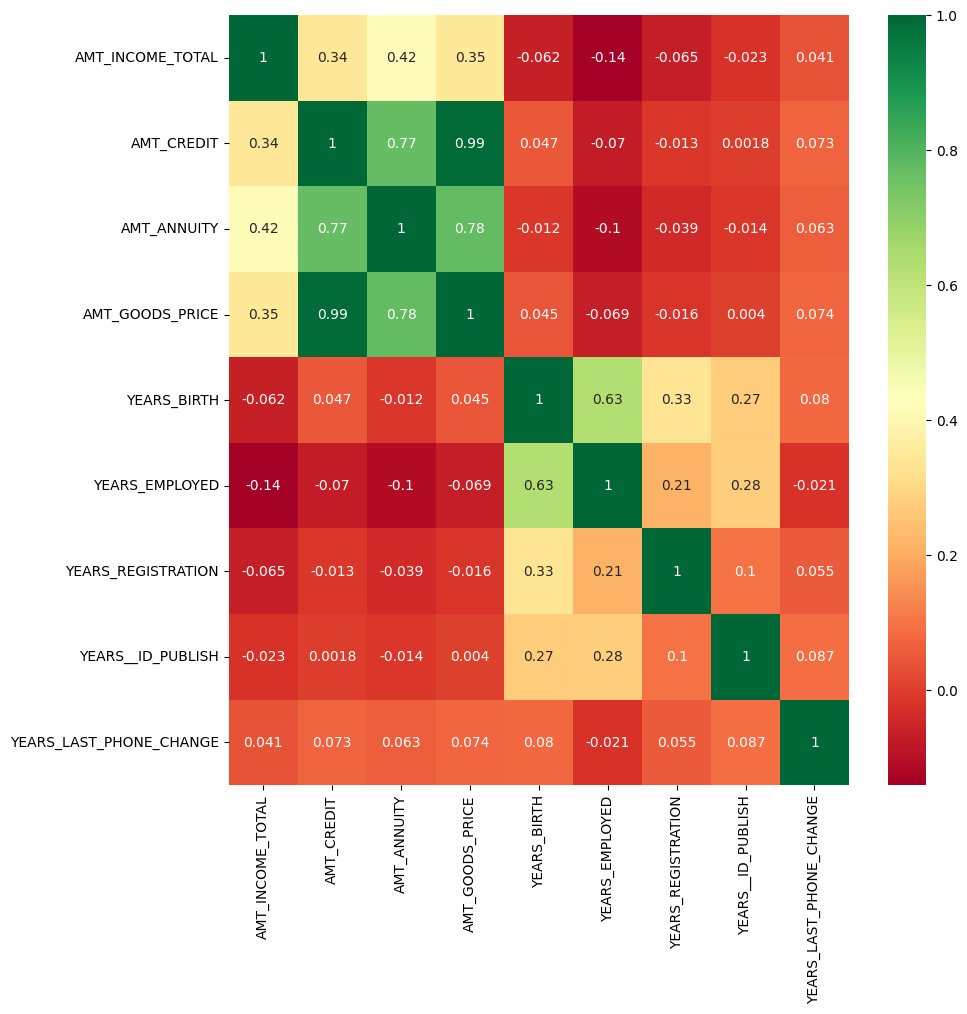

In [65]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_data_0.corr(), annot = True, cmap = "RdYlGn")
plt.show()

- Conclusion >>

1. AMT_INCOME_TOTAL - It has a positive corelation index of 0.34.0.42,0.35 with AMT_CREDIT.AMT_ANNUITY AMT_GOODS_PRICE respectively and Negative with most of the other Year columns.

2. AMT_CREDIT - Is has a strong positive coreltaion index of 0.99.0.77 with AMT_GOODS_PRICE, AMT_ANNUITY respectively.

3. AMT_ANNUITY - Is has positive coreltaion index of 0.77,0 78 with AMT_CREDIT,AMT_GOODS_PRICE respectively and Negative with most of the other Year columns.

4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.78,0.99 with AMT_ANNUITY, AMT_CREDIT.

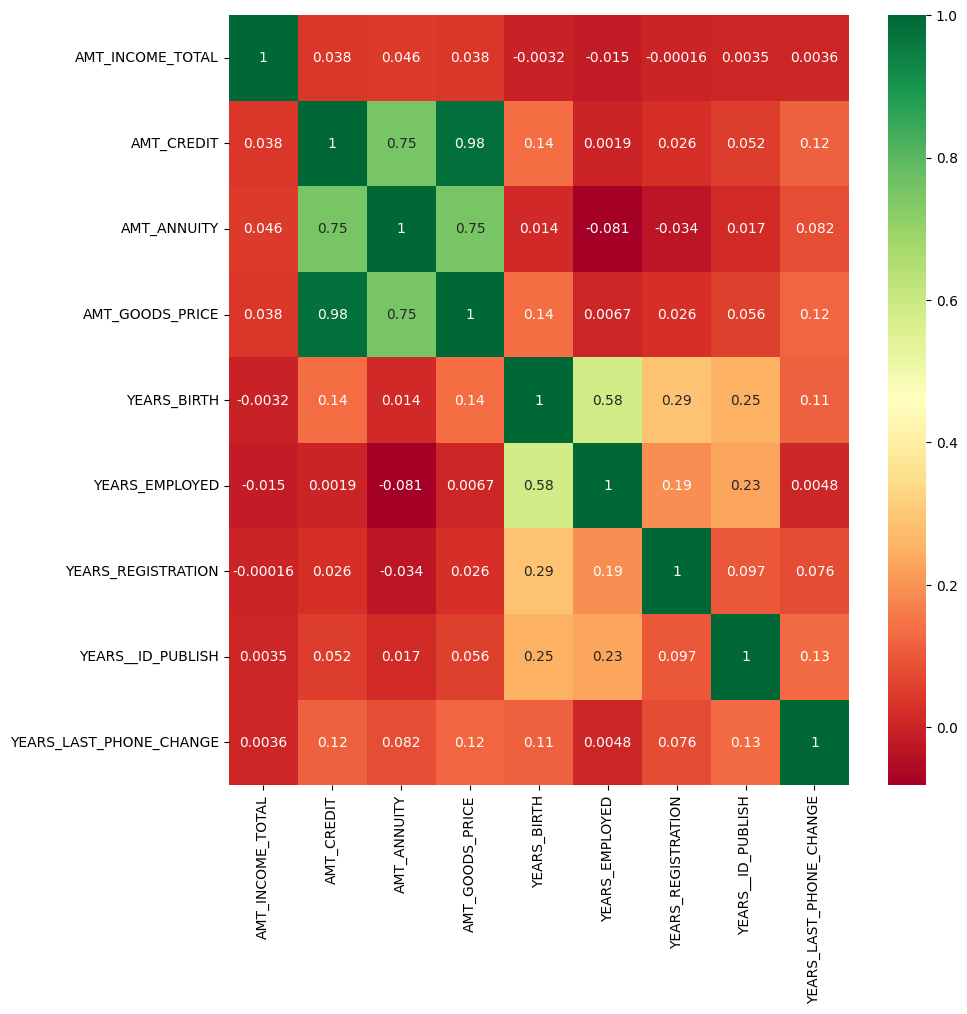

In [66]:
plt.figure(figsize = (10,10))
sns.heatmap(corr_data_1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

- Conclusion >>

1. AMT_INCOME_TOTAL-It is less correlated with  AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE respectively.

2. AMT_CREDIT- Is has a strong positive coreltaion index of 0.98,0.75 with AMT_GOODS_PRICE, AMT_ANNUITY respectively and also positive corelation with other Year Columns.

3. AMT_ANNUITY - Is has positive coreltaion index of 0.75 with AMT_CREDIT,AMT_GOODS_PRICE and Negative with YEAR EMPLOYED, YEAR_REGISTRATION.

4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.75,0.98 with AMT_ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns.

## Read previous Application

In [67]:
papp_data = pd.read_csv("previous_application.csv")
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

## Data Inspection on Previous Application dataset

### Get info and shape on the  datset

In [68]:
papp_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [69]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [70]:
papp_data.shape

(1670214, 37)

## Data Quality Check

## check the Percentage of null values in Application Dataset

In [71]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

## Deleting the Column with 49 % and more null values

In [72]:
percentage = 49
threshold_p = int(((100-percentage) / 100) * papp_data.shape[0]+1)
papp_df = papp_data.dropna(axis=1, thresh = threshold_p)
papp_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  ...  \
0                       15                           Y  ...   
1                       11                           Y  ...   
2                       11                           Y  ...   
3                        7                           Y  ...   
4                        9                           Y  ...   

   NAME_SELLER_INDUSTRY CNT_PAYMENT NAME_YIELD_GROUP  \
0          Connectivity        12.0           middle   
1                   XNA        36.0       low_action   
2                   XNA        12.0             high   
3                   XNA        12.0           middle   
4                   XNA        24.0             high   

        PRODUCT_COMBINATION DAYS_FIRST_DRAWING DAYS_FIRST_DUE  \
0  POS mobile with interest           365243.0          -42.0   
1          Cash X-Sell: low           365243.0         -134.0   
2         Cash X-Sell: high           365243.0         -271.0   
3       Cash X-Sell: middle           365243.0         -482.0   
4         Cash Street: high                NaN            NaN   

  DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0         -42.0            -37.0   
1                     916.0      365243.0         365243.0   
2                      59.0      365243.0         365243.0   
3                    -152.0        -182.0           -177.0   
4                       NaN           NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 32 columns]

In [73]:
papp_df.shape

(1670214, 32)

### impute Missing Value

#### check the dtype of missing values in Application datset before imputing values

In [74]:
## effective way to remove negative sign
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes == np.float64:
        papp_df[col] = papp_df[col].apply(lambda x:abs(x))

## Validate if any null values present in Dataset

In [75]:
null_Cols = list(papp_df.columns[papp_df.isna().any()])
len(null_Cols)

11

In [76]:
papp_df.isnull().mean() * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

## Binning of Continuous Variables

### Binning AMT_CREDIT Column

In [77]:
papp_df.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

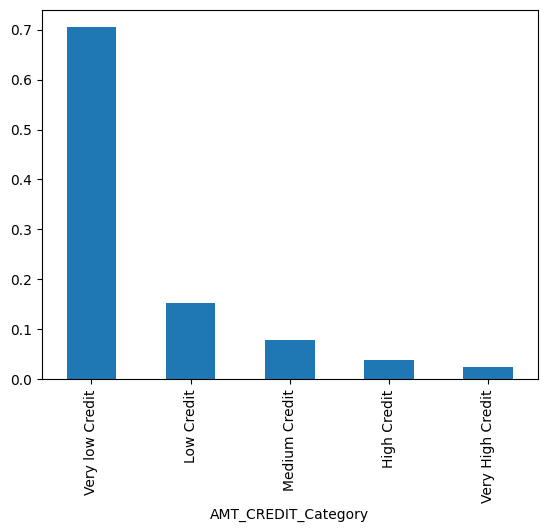

In [78]:
papp_df["AMT_CREDIT_Category"] = pd.cut(papp_df.AMT_CREDIT, [0,200000,400000,600000,800000,1000000],
                                      labels = ['Very low Credit',"Low Credit",'Medium Credit',"High Credit", "Very High Credit"])
papp_df.AMT_CREDIT_Category.value_counts(normalize = True).plot.bar()
plt.show()

In [79]:
print(papp_df["AMT_GOODS_PRICE"])

0           17145.0
1          607500.0
2          112500.0
3          450000.0
4          337500.0
             ...   
1670209    267295.5
1670210     87750.0
1670211    105237.0
1670212    180000.0
1670213    360000.0
Name: AMT_GOODS_PRICE, Length: 1670214, dtype: float64


- Conclusion>> The Credit amount on the loan for the most applicants is either low ( 200000 to 400000)

In [80]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.cut(papp_df.AMT_GOODS_PRICE, [0,100000,200000,300000,400000,500000],
                               labels = ["Very Low Price", "Low Price", "Medium Price", "High Price", "Very- High Price"])


In [81]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize = True)*100

AMT_GOODS_PRICE_Category
Very Low Price      52.643901
Low Price           24.920835
Medium Price        11.717813
Very- High Price     6.193686
High Price           4.523766
Name: proportion, dtype: float64

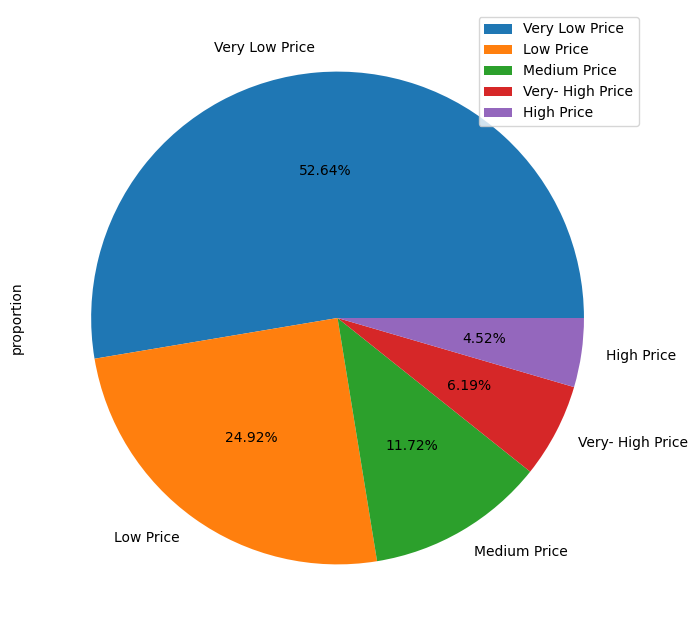

In [82]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize = True).plot.pie(autopct = '%1.2f%%', figsize = (8,8))
plt.legend()
plt.show()

## Data Imbalance Check

### Dividing Application Dataset with NAME_CONTRACT_STATUS

In [83]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS == "Approved"]
canceled = papp_df[papp_df.NAME_CONTRACT_STATUS == "Canceled"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS == "Unused offer"]

In [84]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize = True) *100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

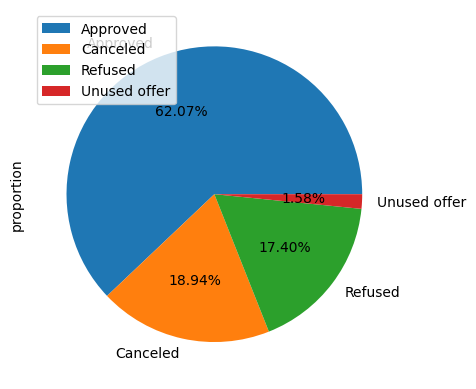

In [85]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize = True).plot.pie(autopct = "%1.2f%%")
plt.legend()
plt.show()

- Conclusion>> 62% of the Applicants have the loan approved, 19% are Cancelled, 17 % are rejected where as only 1.5% are Unused.

## Univariate Analyasis

In [86]:
cat_cols = list(papp_df.columns[papp_df.dtypes == 'object'])
num_cols = list(papp_df.select_dtypes(include=['int64', 'float64']).columns)

In [87]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [88]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [89]:
cat_cols = ['NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','NAME_CLIENT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

In [90]:
num_cols = [
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'CNT_PAYMENT',
 ]

### plot on categorical Columns


NAME_CONTRACT_TYPE
Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: proportion, dtype: float64


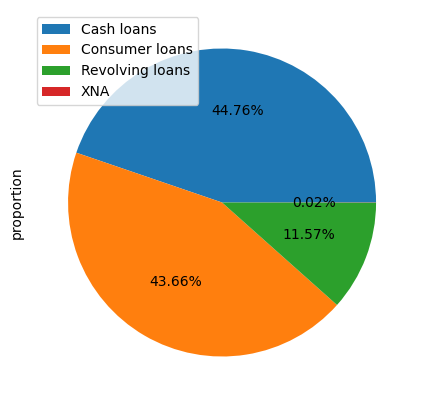

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.152746
WEDNESDAY    0.152681
MONDAY       0.151811
FRIDAY       0.150908
THURSDAY     0.149142
SATURDAY     0.144072
SUNDAY       0.098641
Name: proportion, dtype: float64


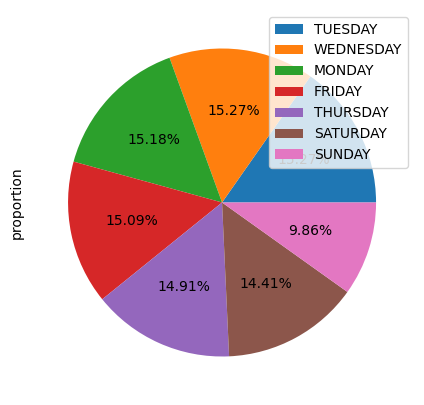

NAME_CONTRACT_STATUS
Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: proportion, dtype: float64


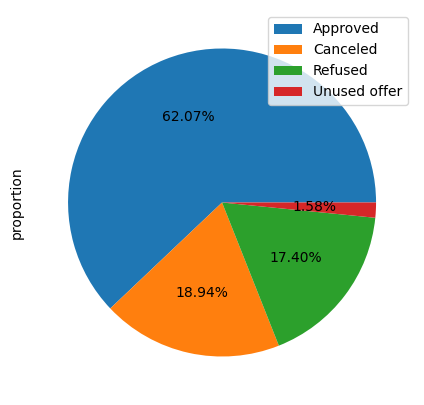

NAME_PAYMENT_TYPE
Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: proportion, dtype: float64


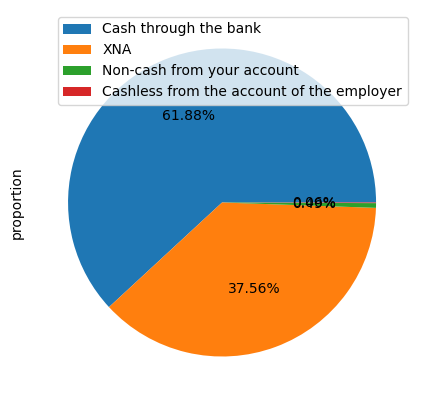

NAME_CLIENT_TYPE
Repeater     0.737188
New          0.180434
Refreshed    0.081217
XNA          0.001162
Name: proportion, dtype: float64


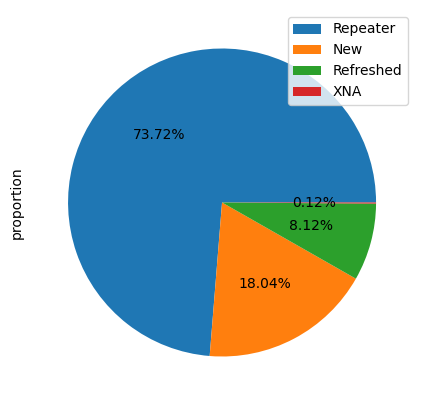

CHANNEL_TYPE
Credit and cash offices       0.431063
Country-wide                  0.296184
Stone                         0.126980
Regional / Local              0.064978
Contact center                0.042687
AP+ (Cash loan)               0.034155
Channel of corporate sales    0.003682
Car dealer                    0.000271
Name: proportion, dtype: float64


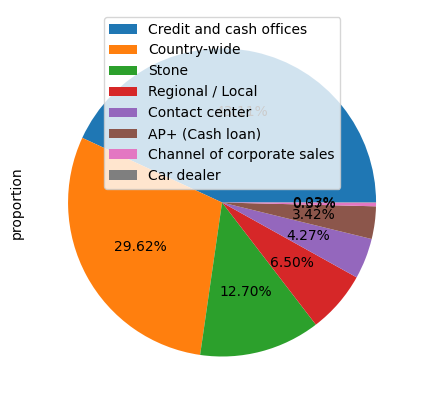

NAME_SELLER_INDUSTRY
XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: proportion, dtype: float64


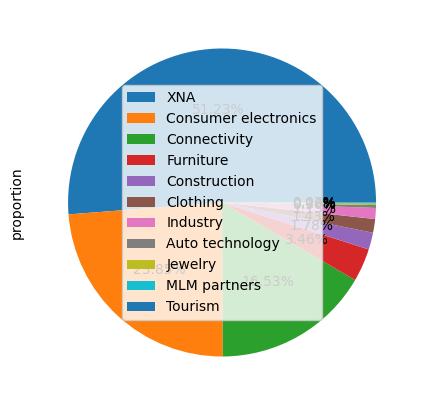

NAME_YIELD_GROUP
XNA           0.309670
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: proportion, dtype: float64


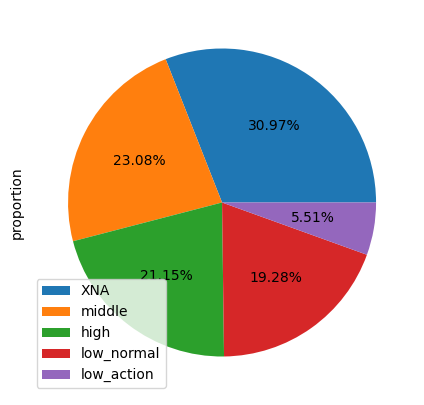

PRODUCT_COMBINATION
Cash                              0.171265
POS household with interest       0.157870
POS mobile with interest          0.132148
Cash X-Sell: middle               0.086164
Cash X-Sell: low                  0.077999
Card Street                       0.067420
POS industry with interest        0.059186
POS household without interest    0.049649
Card X-Sell                       0.048257
Cash Street: high                 0.035715
Cash X-Sell: high                 0.035512
Cash Street: middle               0.020755
Cash Street: low                  0.020261
POS mobile without interest       0.014421
POS other with interest           0.014300
POS industry without interest     0.007547
POS others without interest       0.001530
Name: proportion, dtype: float64


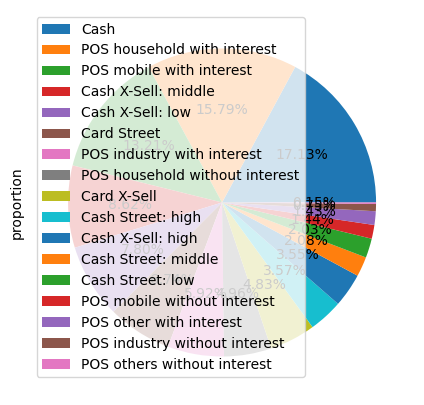

In [91]:
for col in cat_cols:
    print(papp_df[col].value_counts(normalize = True))
    plt.figure(figsize = [5,5])
    papp_df[col].value_counts(normalize= True).plot.pie(labeldistance = None,autopct = '%1.2f%%')
    plt.legend()
    plt.show()

- Conclusion >>

1. NAME_CONTRACT_TYPE-45% Applicants received Cash loans, 44% Applicants received Consumer loans, 12% received Revolving duning previous application

2. WEEKDAY_APPR_PROCESS_START - All the days have almost equal number of previous loan application 3 NAME_CONTRACT_STATUS-62% of applications are approved, 19% Cancelled, 17% Refused and 2% unused

4. NAME PAYMENT_TYPE-62% of Payment type are Cash through bank, 32% Other modes

5. NAME CLIENT TYPE -74% of Applicants are Repeaters 18% are New applicants, 8% are Refreshed Appplicants

6. NAME SELLER_INDUSTRY-51% are from other Industries, 24%, 17% are from Consumer electronics, Connectivity Industry respectively

7. CHANNEL TYPE -43% Channel type is Credit and cash offices, 29% are country wide

8. NAME_YIELD_GROUP - Majornty of the yield group are others

9. PRODUCT_COMBINATION-Most used PRODUCT COMBINATION is Cash followed by POS household with interest, POS mobile with interest

### Plot on Numerical Columns



99th percentile nan
count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


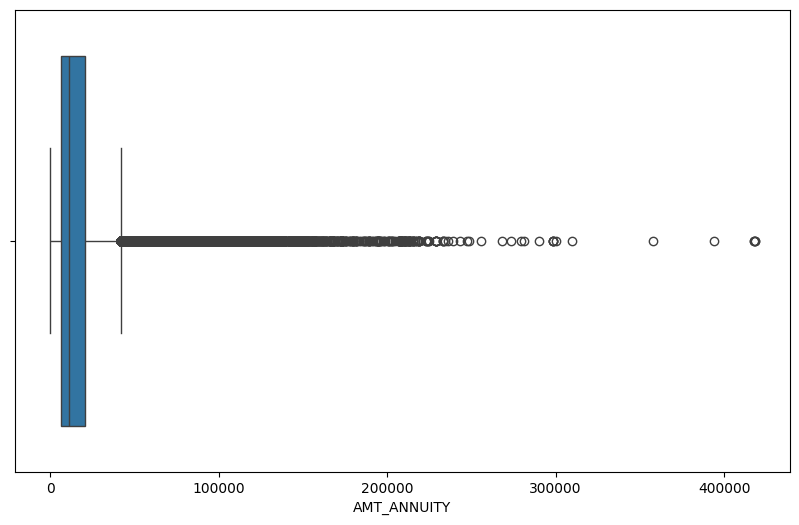

----------------
99th percentile 1350000.0
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


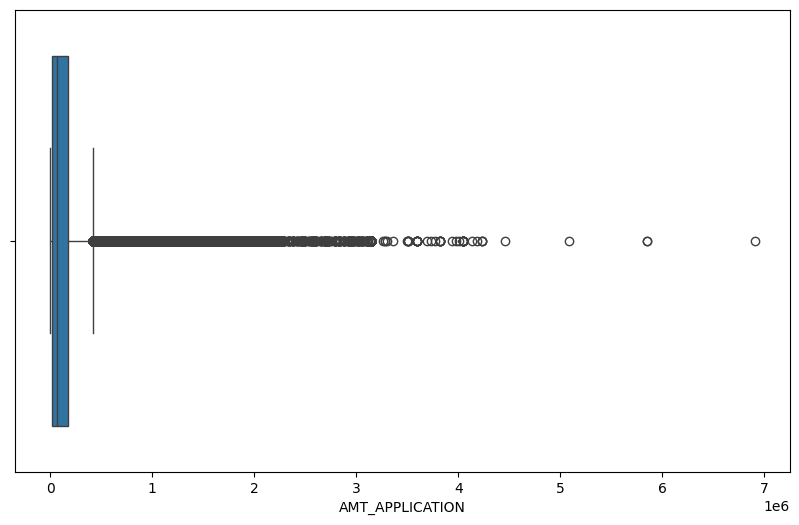

----------------
99th percentile nan
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


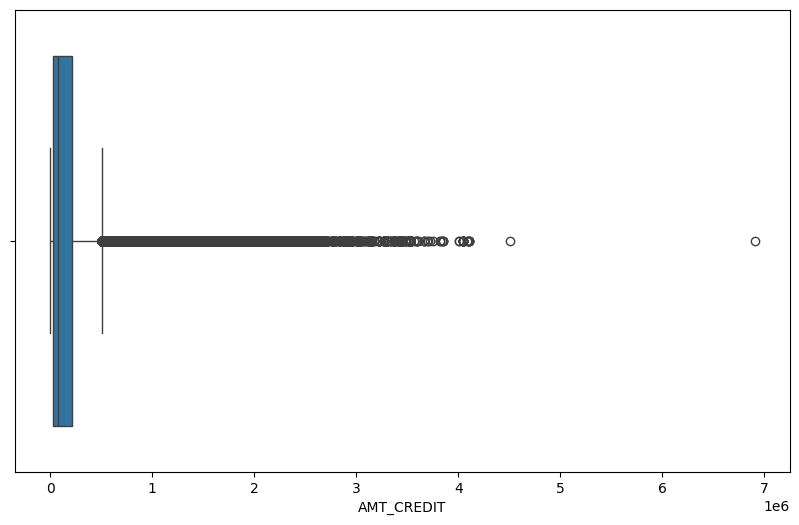

----------------
99th percentile nan
count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64


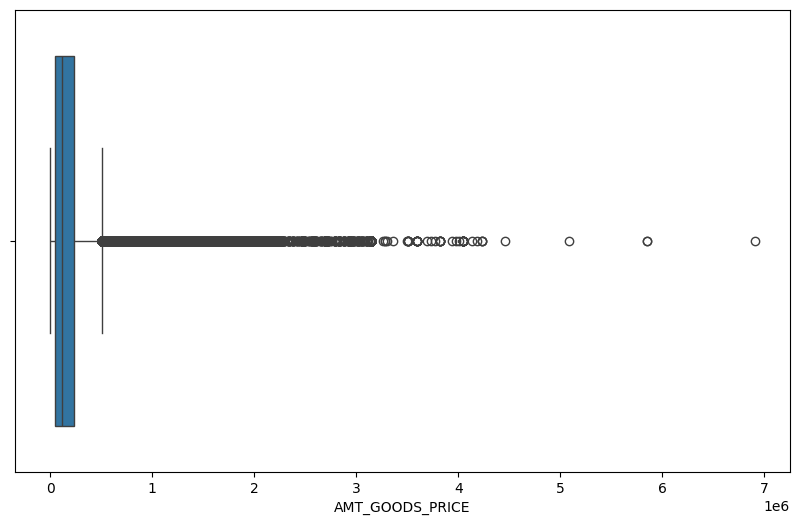

----------------
99th percentile 20.0
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


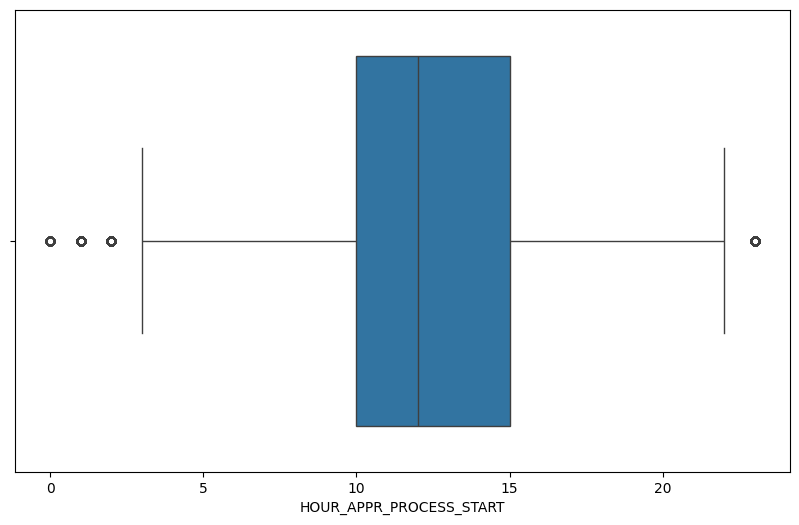

----------------
99th percentile 2835.0
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


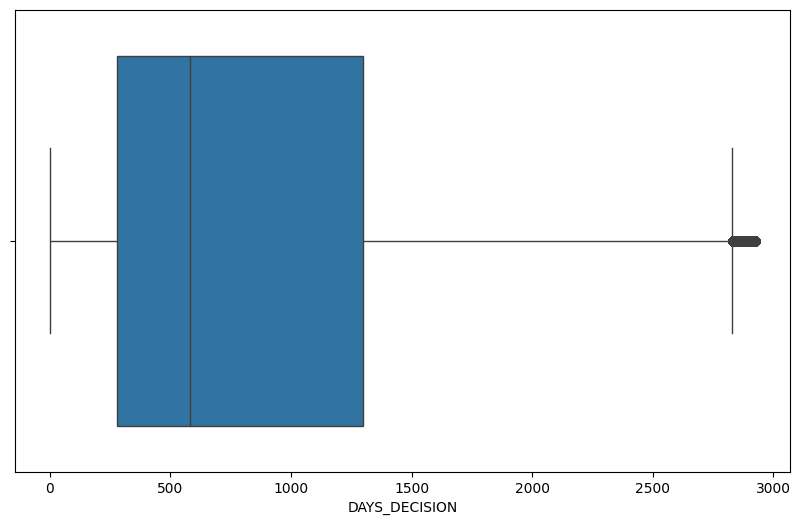

----------------
99th percentile nan
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


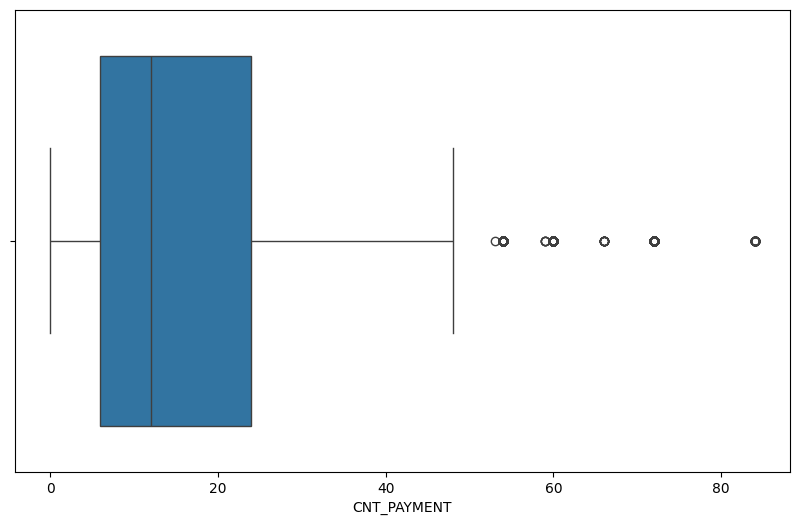

----------------


In [92]:
for col in num_cols:
    print("99th percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize= (10,6))
    sns.boxplot(data = papp_df, x = col)
    plt.show()
    print("----------------")

- Conclusion >> Few Columns are with outliers are below

1. HOUR APPR_PROCESS_START has few outliers and there small difference between mean and median

2. AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

4. AMT GOODS PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

5. AMT APPLICATION Column has a few outillers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation in mean and median due to outliers

6. CNT PAYMENT Column has few outliers and there small difference between mean and median

7. DAYS DECISION has few outliers and there small difference between mean and median

## Bivariate & Multivariate Anyalsis

### Bivarient Analysis btw WEEKDAY_APPR_PROCESS_START vs AMT_APPLICATION

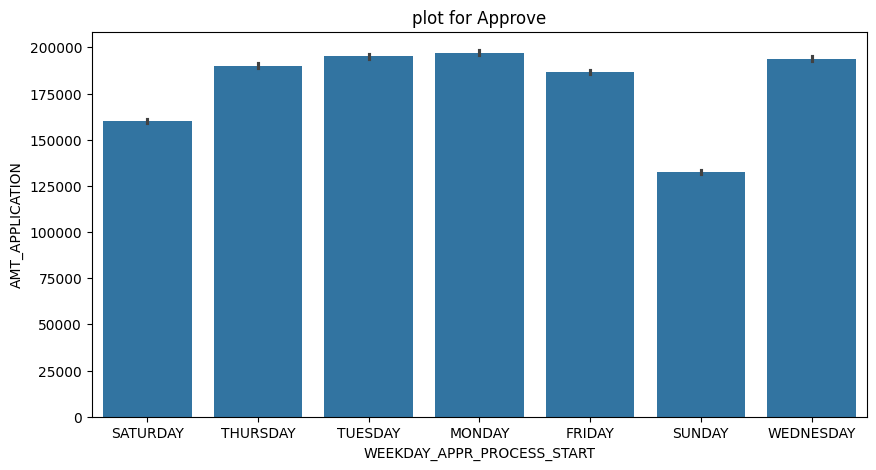

In [93]:
plt.figure(figsize = (10,5))

sns.barplot(x = "WEEKDAY_APPR_PROCESS_START",y = "AMT_APPLICATION", data= approved)
plt.title("plot for Approve")
plt.show()

In [95]:
print(canceled)

         SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
24          1555330      199353         Cash loans          NaN   
...             ...         ...                ...          ...   
1670186     1433968      272570         Cash loans          NaN   
1670187     1971628      435554         Cash loans          NaN   
1670188     1713281      247019         Cash loans    26446.500   
1670189     2406354      377114         Cash loans    26240.715   
1670190     2381880      175920         Cash loans          NaN   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
6                    0.0         0.0              NaN   
7                    0.0         0.0              NaN   
8                    0.0

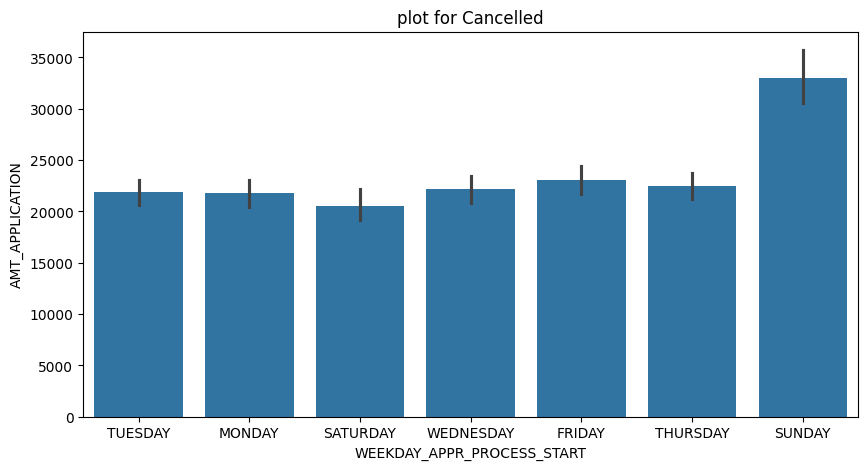

In [96]:
plt.figure(figsize = (10,5))

sns.barplot(x = "WEEKDAY_APPR_PROCESS_START",y = "AMT_APPLICATION", data= canceled)
plt.title("plot for Cancelled")
plt.show()

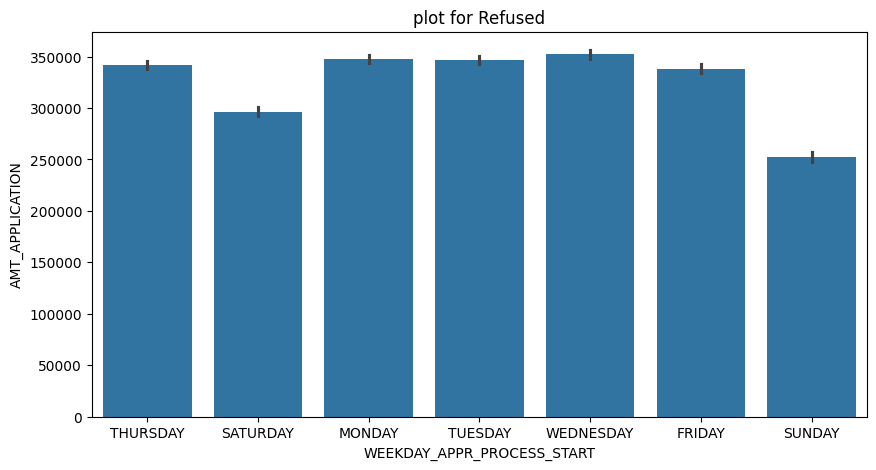

In [97]:
plt.figure(figsize = (10,5))

sns.barplot(x = "WEEKDAY_APPR_PROCESS_START",y = "AMT_APPLICATION", data= refused)
plt.title("plot for Refused")
plt.show()

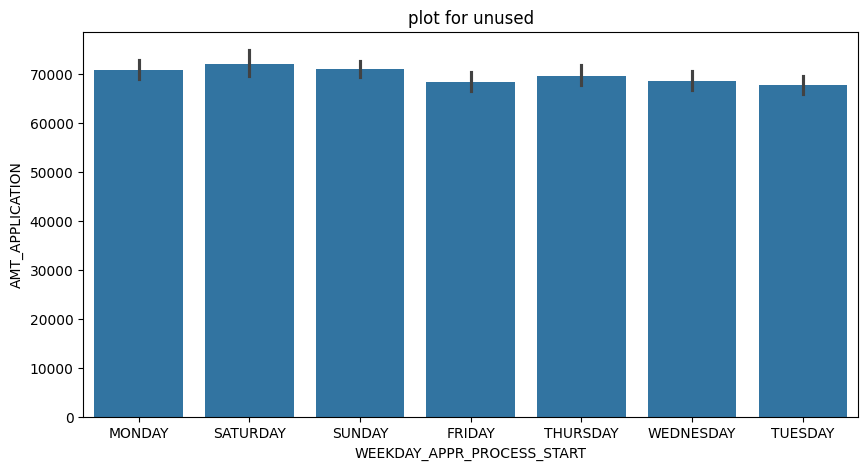

In [98]:
plt.figure(figsize = (10,5))

sns.barplot(x = "WEEKDAY_APPR_PROCESS_START",y = "AMT_APPLICATION", data= unused)
plt.title("plot for unused")
plt.show()

- Conclusion >>

1. The Credit Amount of applicants with approved status is high on Monday and Wednesday than other days, and least on Sunday

2. The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days

3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday

4. The Credit Amount of applicants with unused offer status is almost equal on all days

### Bivariate Analysis btw AMT_ANNUITY vs AMT_GOODS_PRICE

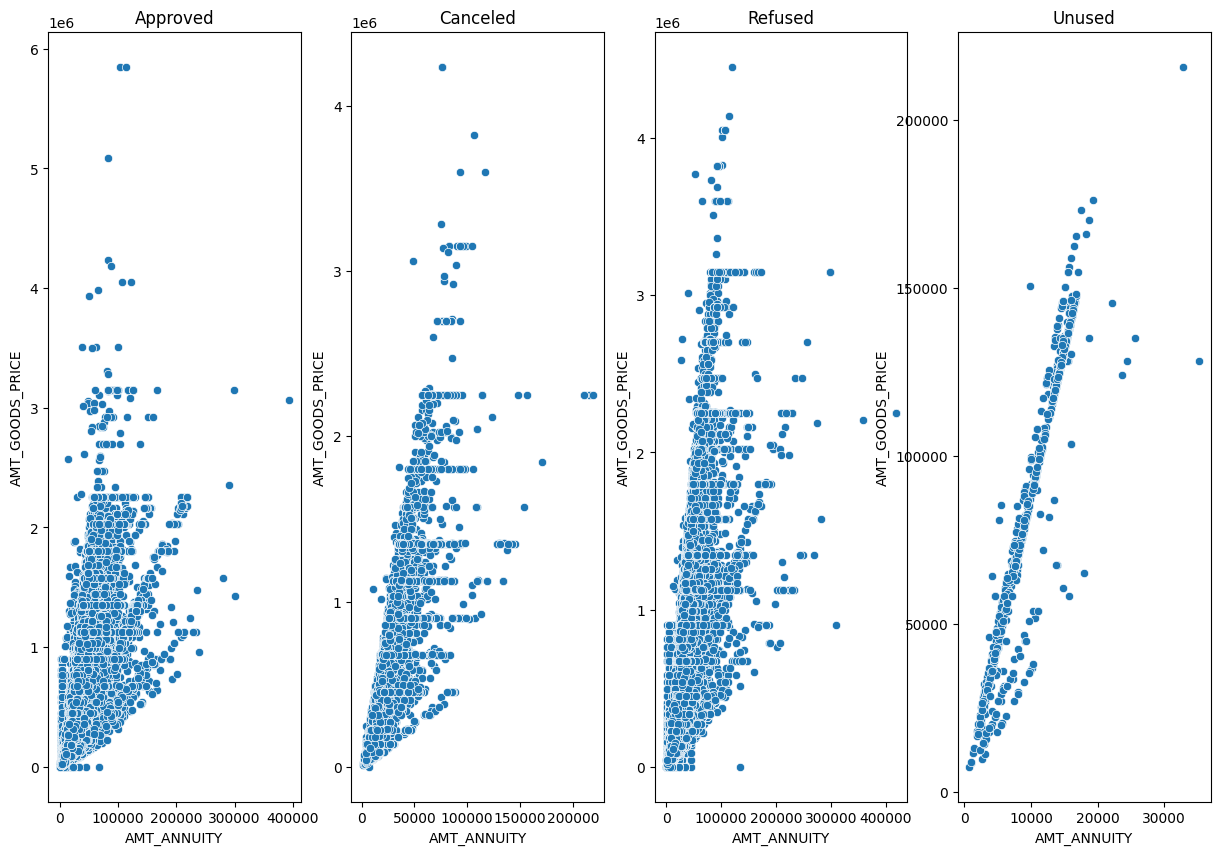

In [99]:
plt.figure(figsize = (15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x="AMT_ANNUITY", y = "AMT_GOODS_PRICE", data = approved)
plt.subplot(1,4,2)
plt.title("Canceled")
sns.scatterplot(x="AMT_ANNUITY", y = "AMT_GOODS_PRICE", data = canceled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x="AMT_ANNUITY", y = "AMT_GOODS_PRICE", data = refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x="AMT_ANNUITY", y = "AMT_GOODS_PRICE", data = unused)

plt.show()

 - Conclusion >>

1. For loan status as Approved, Refused, Cancelled Amount of annuity increases with goods price

2. For loan status as Refused it has no linear relationship

## Co-relation btw numerical Columns

In [100]:
corr_approved = approved[['DAYS_DECISION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_refused = refused[['DAYS_DECISION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_canceled =canceled[['DAYS_DECISION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_unused = unused[['DAYS_DECISION','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]

### Co-relation for Numerical columns for Approved

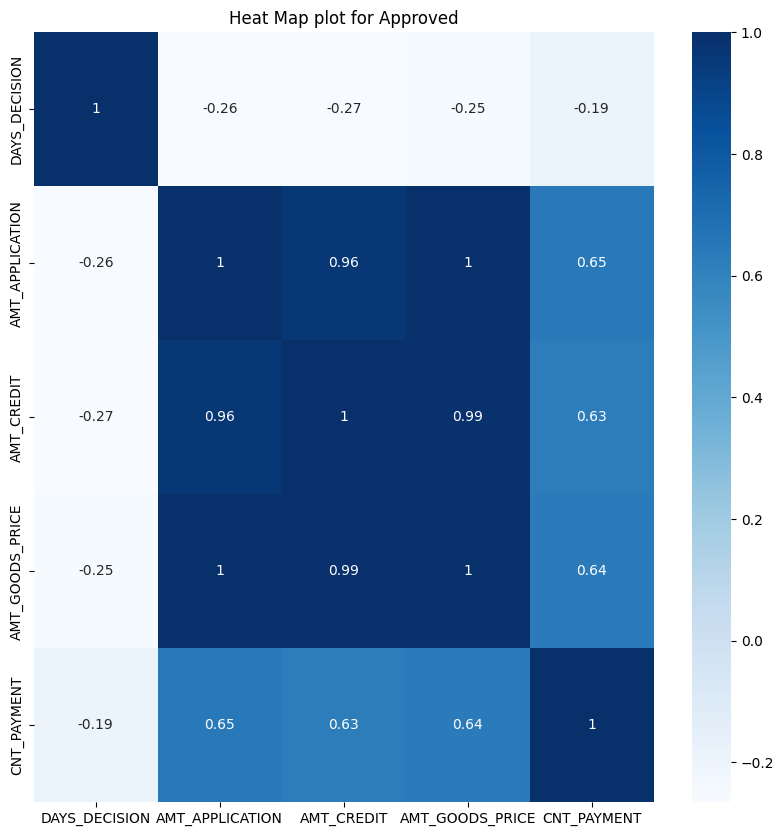

In [101]:
plt.figure(figsize =[10,10])
sns.heatmap(corr_approved.corr(),annot= True, cmap ="Blues")
plt.title("Heat Map plot for Approved")
plt.show()
    

- Conclusion >>

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE AMT_ANNUITY

2. DAYS_DECISION has negative Corelation with AMT_GOODS_PRICE,AMT_CREDIT, AMT_APPLICATION.CNT_PAYMENTAMT_ANNUITY

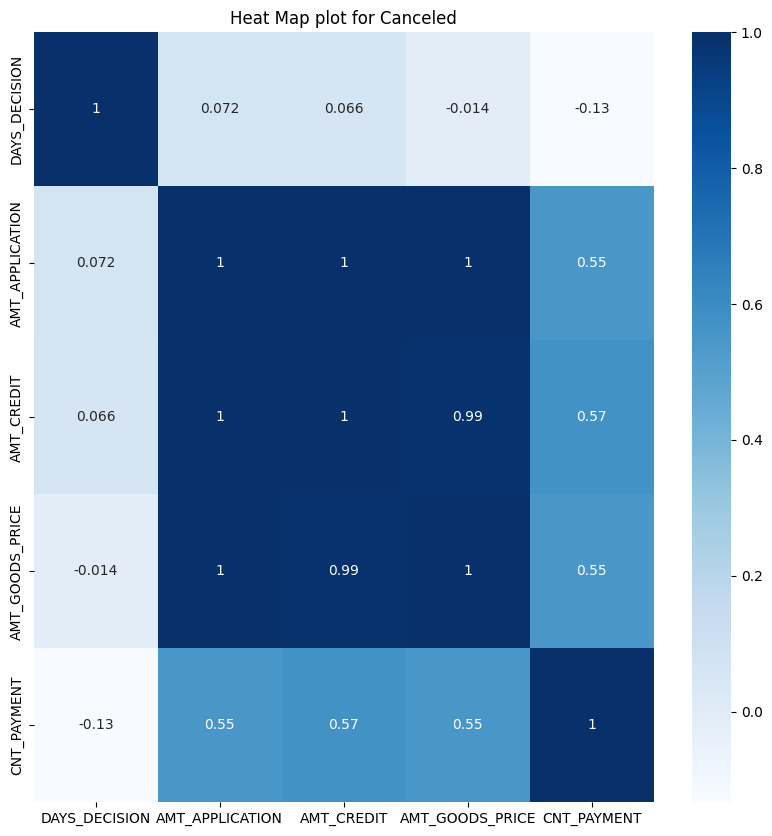

In [102]:
plt.figure(figsize =[10,10])
sns.heatmap(corr_canceled.corr(),annot= True, cmap ="Blues")
plt.title("Heat Map plot for Canceled")
plt.show()

- Conclusion >> For Cancelled Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE

2. DAYS_DECISION has positive Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION

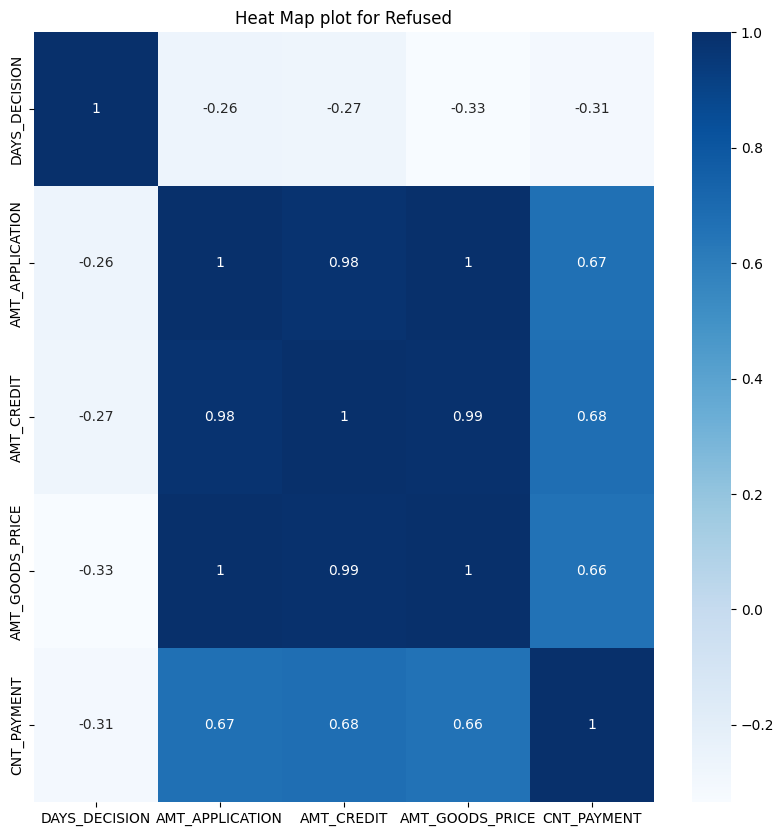

In [103]:
plt.figure(figsize =[10,10])
sns.heatmap(corr_refused.corr(),annot= True, cmap ="Blues")
plt.title("Heat Map plot for Refused")
plt.show()

- Conclusion >> For Refused Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE.AMT_ANNUITY

2. DAYS DECISION has negative Corelation with AMT_GOODS_PRICE.AMT_CREDIT, AMT_APPLICATION.CNT_PAYMENTAMT_ANNUITY

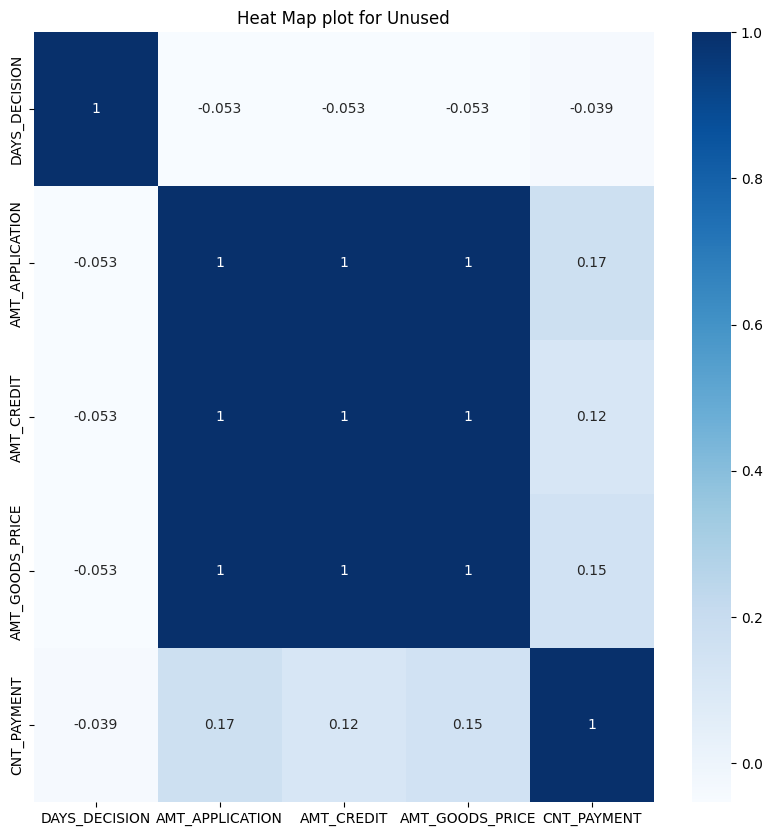

In [104]:
plt.figure(figsize =[10,10])
sns.heatmap(corr_unused.corr(),annot= True, cmap ="Blues")
plt.title("Heat Map plot for Unused")
plt.show()

- Conclusion >> For Unused Category

1. AMT APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE

2. DAYS DECISION and CNT_PAYMENT has negative Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION


 ## MERGE the Application and Previous Application DataFrame

In [105]:
merge_df = app_df.merge(papp_df, on= ["SK_ID_CURR"], how= "left")
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
0        24700.5  ...        low_normal      POS other with interest   
1        35698.5  ...        low_normal             Cash X-Sell: low   
2        35698.5  ...            middle   POS industry with interest   
3        35698.5  ...            middle  POS household with interest   
4         6750.0  ...            middle  POS mobile without interest   

  DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION DAYS_LAST_DUE  \
0           365243.0          565.0                     125.0          25.0   
1           365243.0          716.0                     386.0         536.0   
2           365243.0          797.0                     647.0         647.0   
3           365243.0         2310.0                    1980.0        1980.0   
4           365243.0          784.0                     694.0         724.0   

   DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  AMT_CREDIT_Category_y  \
0              17.0                        0.0        Very low Credit   
1             527.0                        1.0                    NaN   
2             639.0                        0.0             Low Credit   
3            1976.0                        1.0        Very low Credit   
4             714.0                        0.0        Very low Credit   

   AMT_GOODS_PRICE_Category  
0                 Low Price  
1                       NaN  
2                High Price  
3            Very Low Price  
4            Very Low Price  

[5 rows x 113 columns]

In [106]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 1.2+ GB


### filtering required columns for our Analysis

In [107]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns= col, axis = 1, inplace= True)

In [108]:
merge_df.shape

(1430155, 84)

In [109]:
res1 = pd.pivot_table(data= merge_df, index = ['NAME_INCOME_TYPE',"NAME_CLIENT_TYPE"],columns = ["NAME_CONTRACT_STATUS"],values = "TARGET", aggfunc = "mean")
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000       NaN       NaN   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000       NaN       NaN   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000       NaN  0.500000   
                     Refreshed         0.000000       NaN       NaN   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                        NaN  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                        NaN  
                     Refreshed                  NaN  
                     Repeater                   NaN  
Unemployed           New                        NaN  
                     Refreshed                  NaN  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

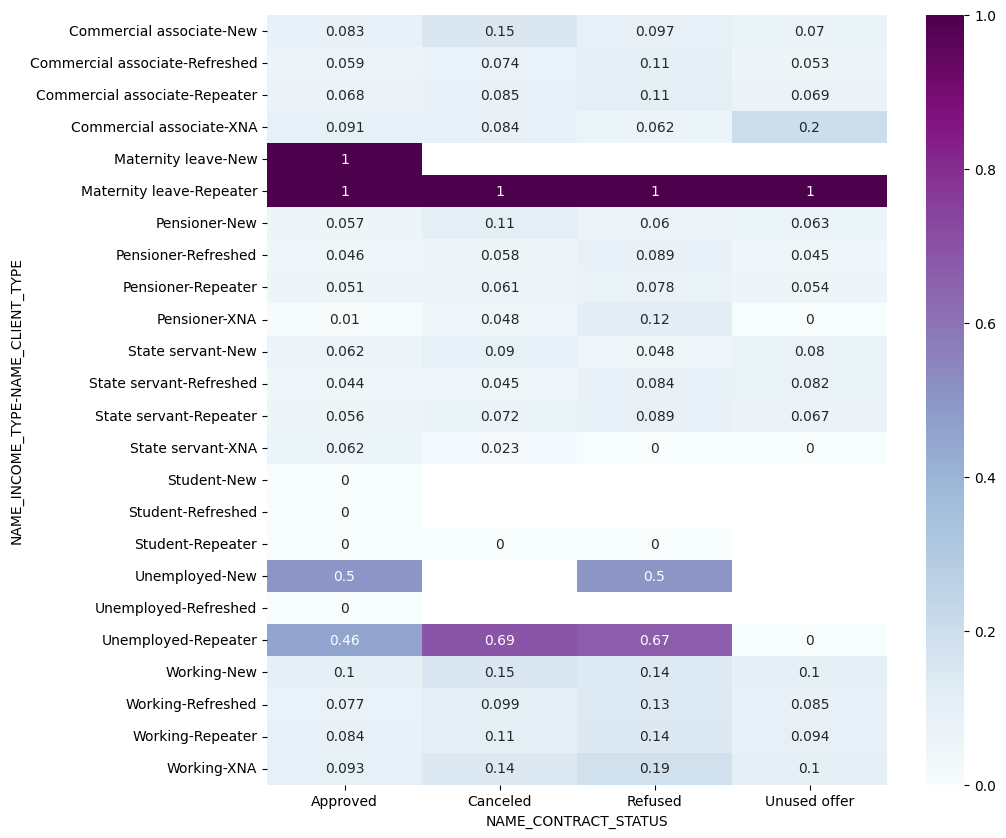

In [110]:
plt.figure(figsize = [10,10])
sns.heatmap(res1, annot= True , cmap = "BuPu")
plt.show()

- Conclusion >>

1. Applicants with income type Maternity leave and client type New are having more chances of getting the loan approved

2. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan cancelled 

3. Applicants with income type Maternity leave, Unemployed and client type Repeater are having getting the loan Refused

4. Applicants with income type Maternity leave and client type Repeater, Working and client type New are not able to utilizte the Bank's offer

In [111]:
res2 = pd.pivot_table(data = merge_df, index = ["CODE_GENDER", 'NAME_SELLER_INDUSTRY'],
                     columns= ["TARGET"], values = "AMT_GOODS_PRICE_x", aggfunc = "sum")

In [112]:
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

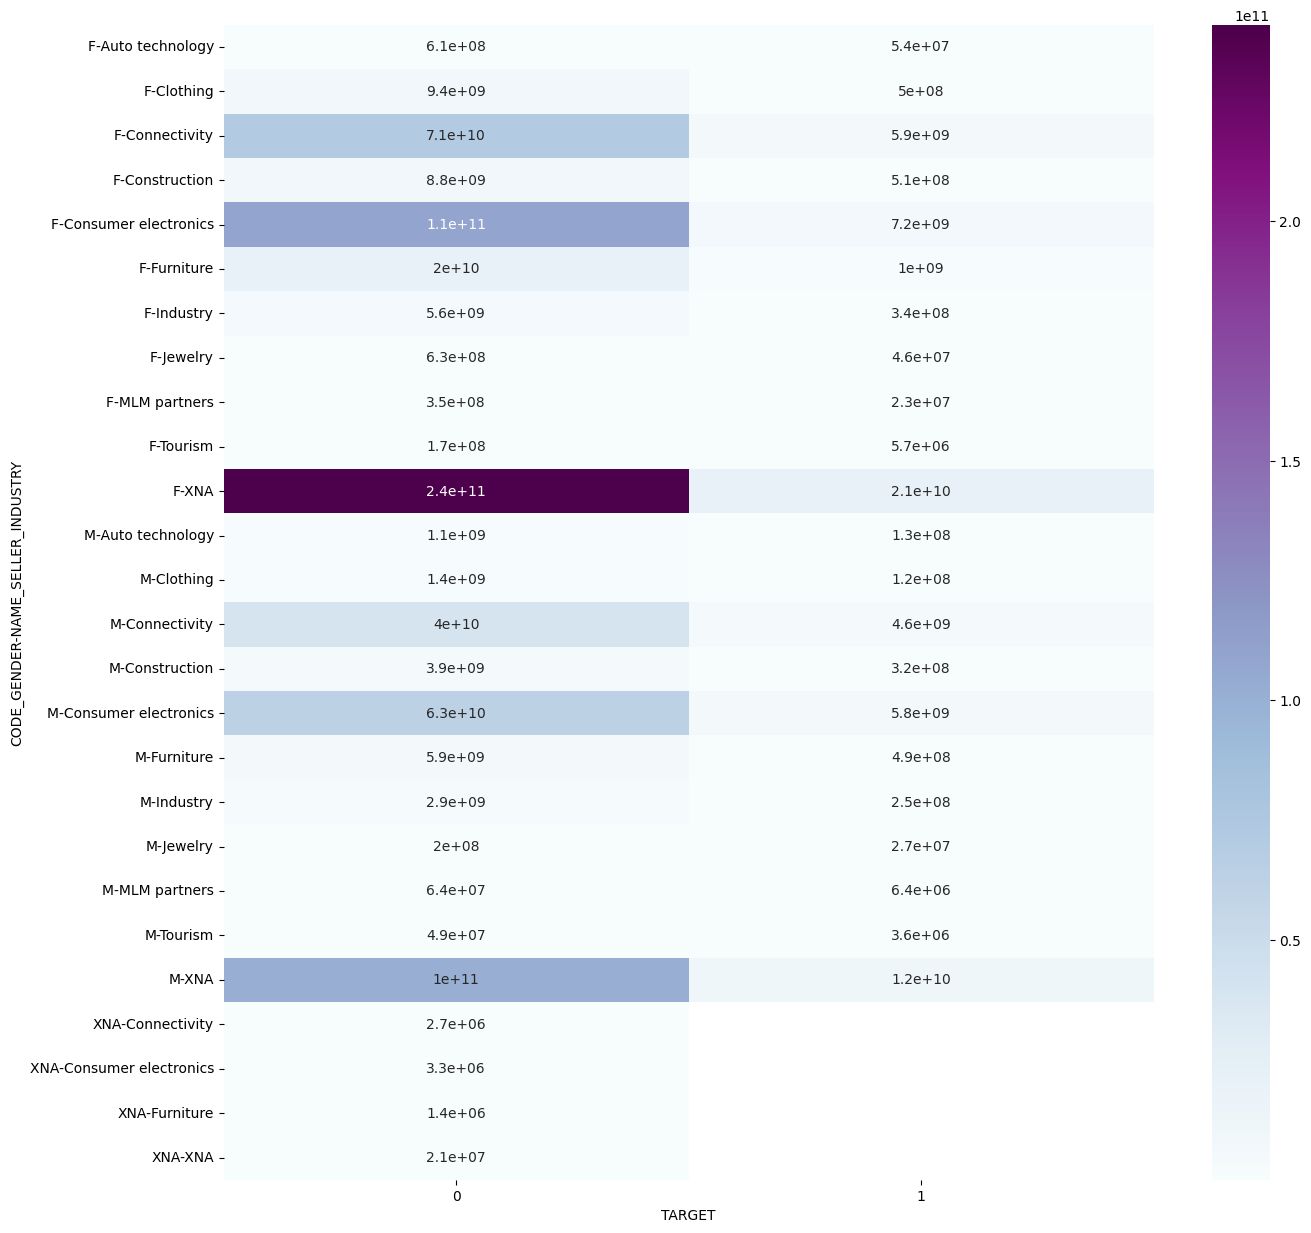

In [113]:
plt.figure(figsize = [15,15])
sns.heatmap(res2, annot= True , cmap = "BuPu")
plt.show()